<strong>Probelm Statement -: To prdict the attrition of an employess</strong>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

<strong> Information About Columns
    <ul>
        <li>Age ||Age of Employee|| Continuos</li>
        <li>Attrition || Whether the employee attrited or not || Categorical || Target Variable</li>
        <li>Business Travel || Category of Business Travel || Categorical</li>
        <li>Daily Rate || Daily wage of employes || Continuos</li>
        <li>Department || Category of Department || Categorical</li>
        <li>DistanceFromHome || Distance From Home of Employee || Continuos</li>
        <li>Education || Education level of employee || Ordinal</li>
        <li>Education Field || Field of Education of Employee || Categorical</li>
        <li>Employee Count || Count of Employess || Ordinal || As it has only one value , we can drop this from our analysis</li>
        <li>Employee Number || identifier of Employer || Ordinal || We can also drop this as it hs nothing to do with our analysis</li>
        <li>EnviormentSatisfaction || EnviormentSatisfactionScore || Ordinal </li>
        <li>Gender || Gender of Employess || Categorical</li>
        <li>Hourly Rate || Hourly Rate of Employee || Continuos</li>
        <li>JobInvolvement || Job Involvement Score || Ordinal</li>
        <li>JobRole || Role of Job || Categorical </li>
        <li>JobSatisfaction || Job Satisfaction Score || Ordinal</li>
        <li>JobLevel || Level of Job || Ordinal</li>
        <li>MaritalStatus || Marital Status of Employee || Cateogrical</li>
        <li>MonthlyIncome || MonthlyIncome of Employee || Continuos</li>
        <li>MonthlyRate || MonthlyRate of Employess || Continuos</li>
        <li>NumCompaniesWorked || Number of Companies Worked || Ordinal</li>
        <li>Over18 || Is employee over 18 years of age || Categorical || As it has only one value , we can drop this from our analysis </li>
        <li>OverTime || Did employee do over time || Categorical</li>
        <li>PercentSalaryHike || Salary Hike Percentage of Employee || Continuos</li>
        <li>RelationShipSatisfaction || Relationship Satisfaction Score || Ordinal</li>
        <li>StandardHours || Standard working hours of employee || Continuos || As it has only one value , we can drop this from our analysis</li>
        <li>StockOptionLevel || Stock Option Level || Ordinal</li>
        <li>Total Working years || Years of Total Working || Continuos</li>
        <li>TrainingTimesLastYear || No of time had training lsat year || Ordinal</li>
        <li>WorkLifeBalance || Work life balance Score || Ordinal</li>
        <li>YearAtCompany || Years of company of employee || Continuos</li>
        <li>YearsInCurrentRole || Years in current role of employee || Continuos</li>
        <li>YearsSinceLastPromotion || Years Since last Promomtion of Employee || Continuos</li>
        <li>YearswithCurrentManager || Years with current Manager || Continuos</li>
    </ul>
</strong>

In [7]:
data.shape

(1470, 35)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<h4>Dropping unneccessary columns</h4>

In [11]:
data = data.drop(columns = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

In [12]:
data.shape

(1470, 31)

<h3>Exploratory Data Analysis</h3>

In [20]:
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [103]:
num_cols = [col for col in data.columns if col not in cat_cols and col!='Attrition']

In [22]:
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

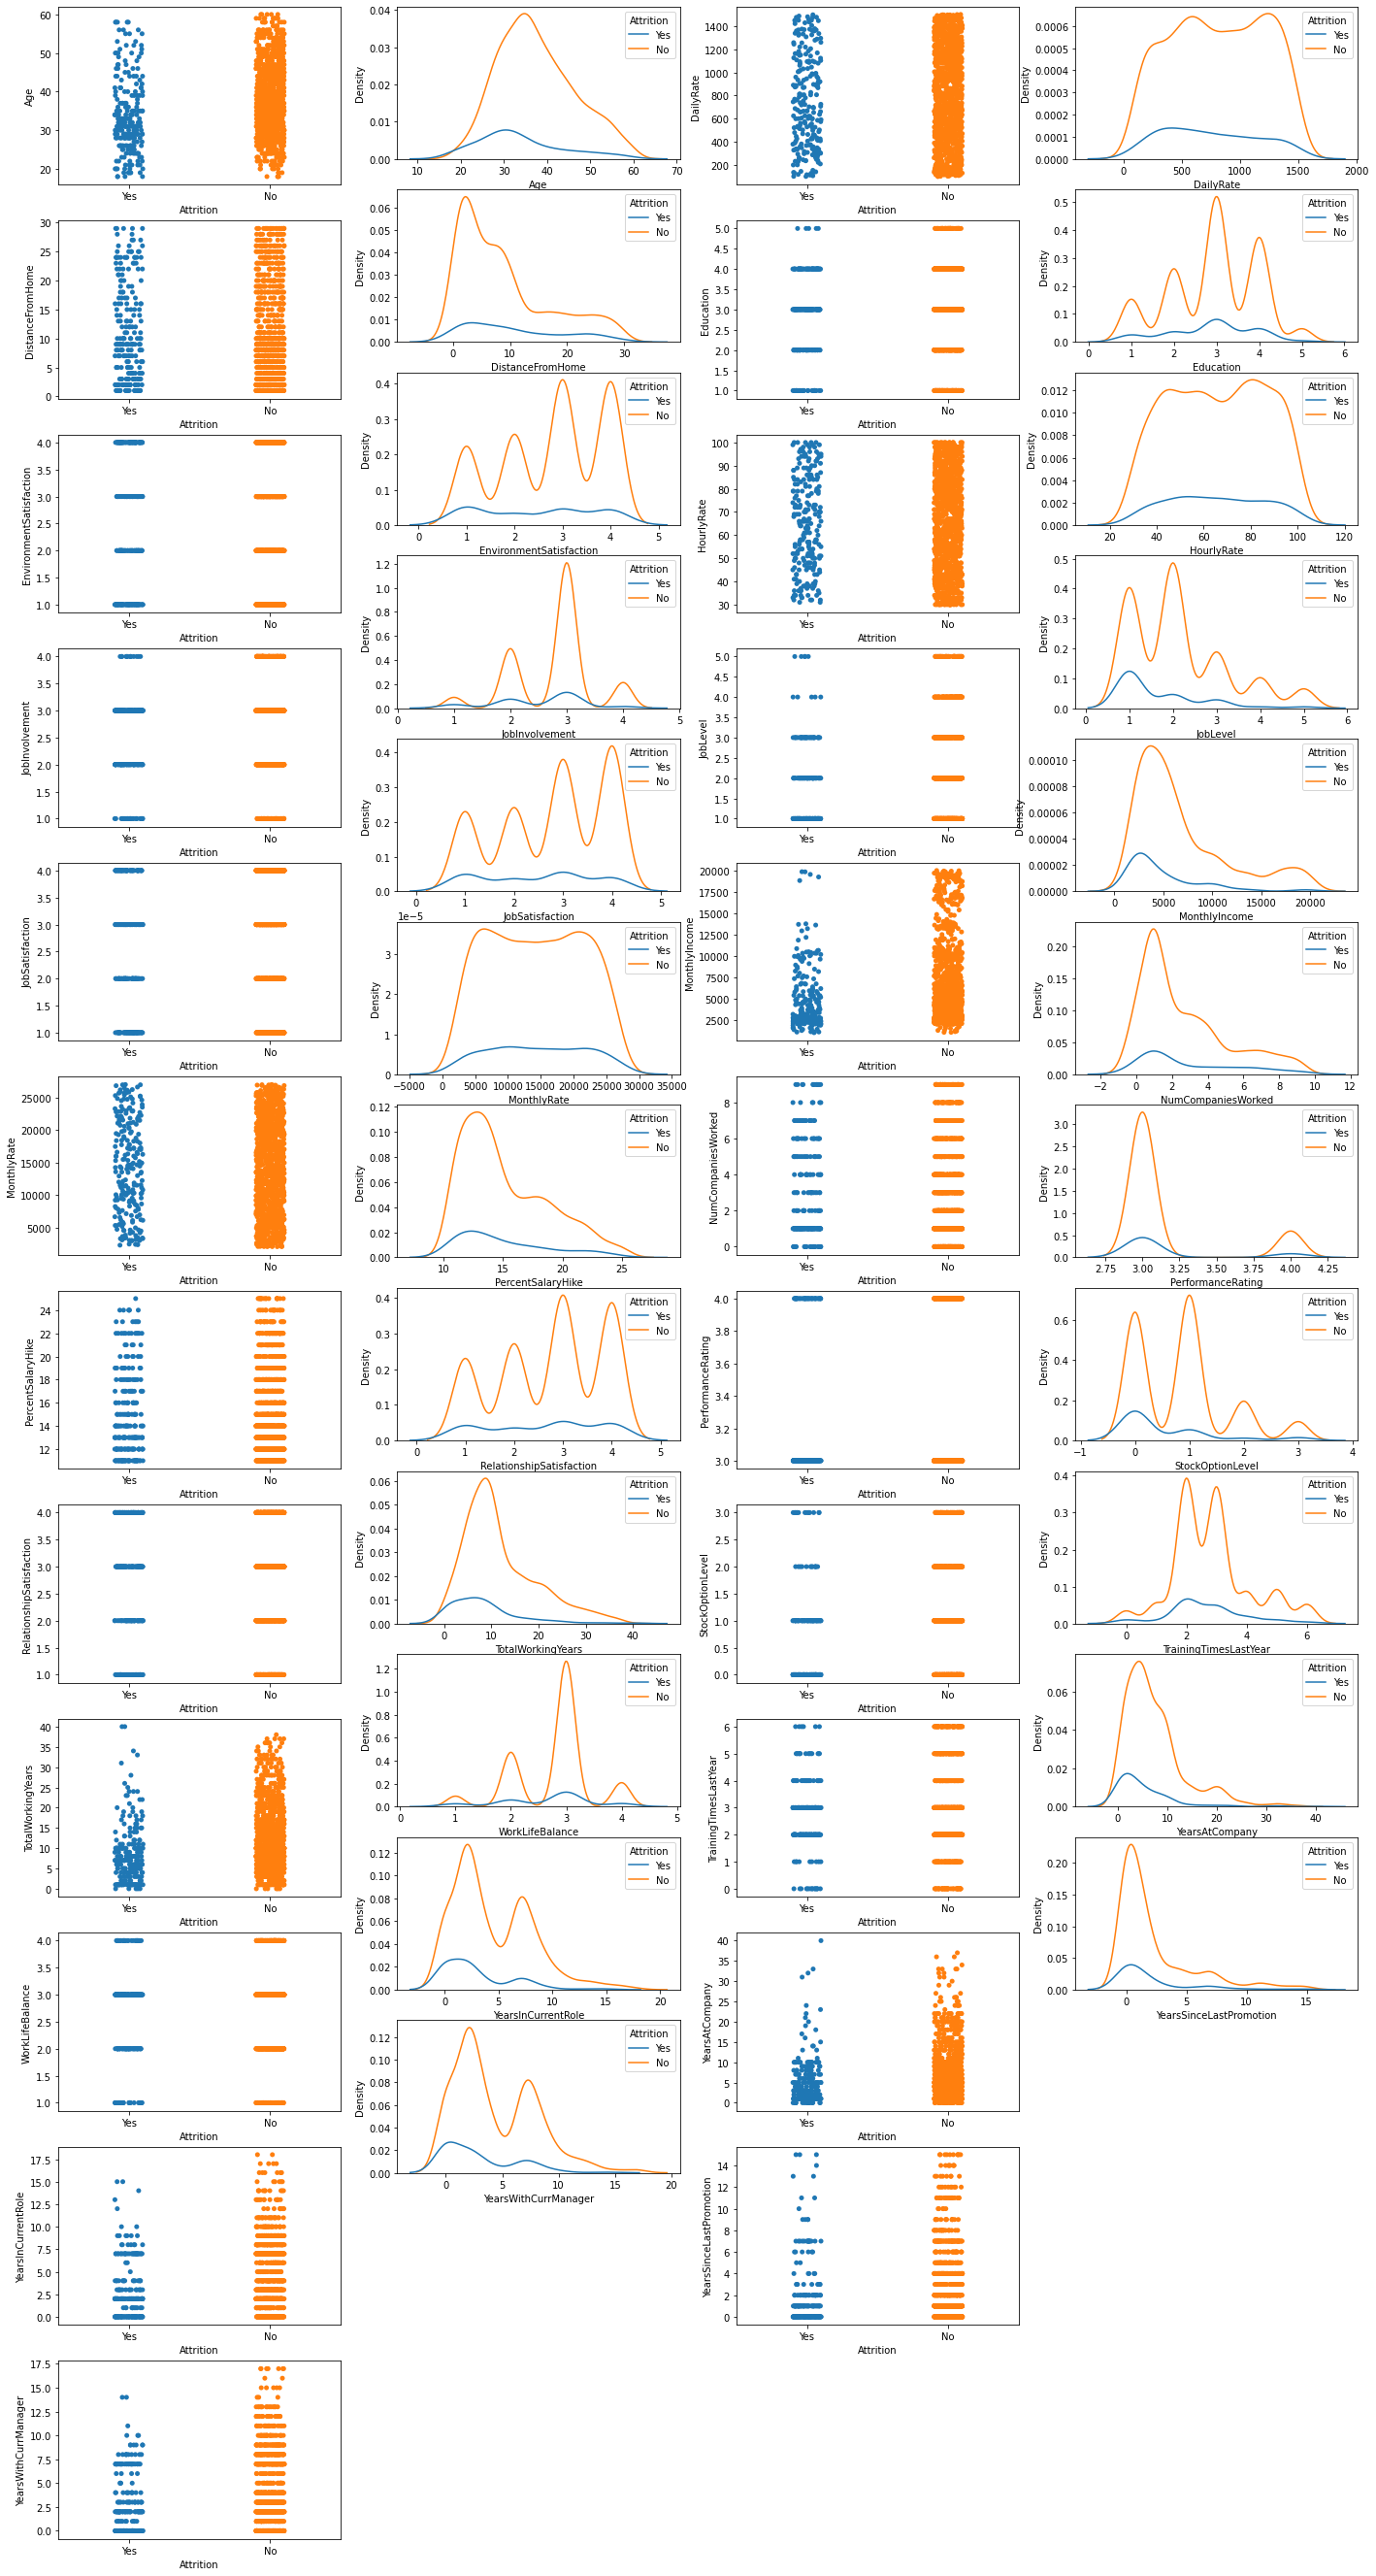

In [23]:
plt.figure(figsize=(24,48))
plotnumber = 1
for col in num_cols:
    plt.subplot(12,4, plotnumber)
    sns.stripplot(x='Attrition', y=col, data=data)
    plotnumber+=1
    plt.subplot(14,4,plotnumber)
    sns.kdeplot(x=col, data=data, hue='Attrition')
    plotnumber+=1

<strong>Not much insight available from these plots, as values are spread almost equally for both categories</strong>

In [29]:
att_yes = data[data['Attrition'] == 'Yes']
att_no = data[data['Attrition'] == 'No']

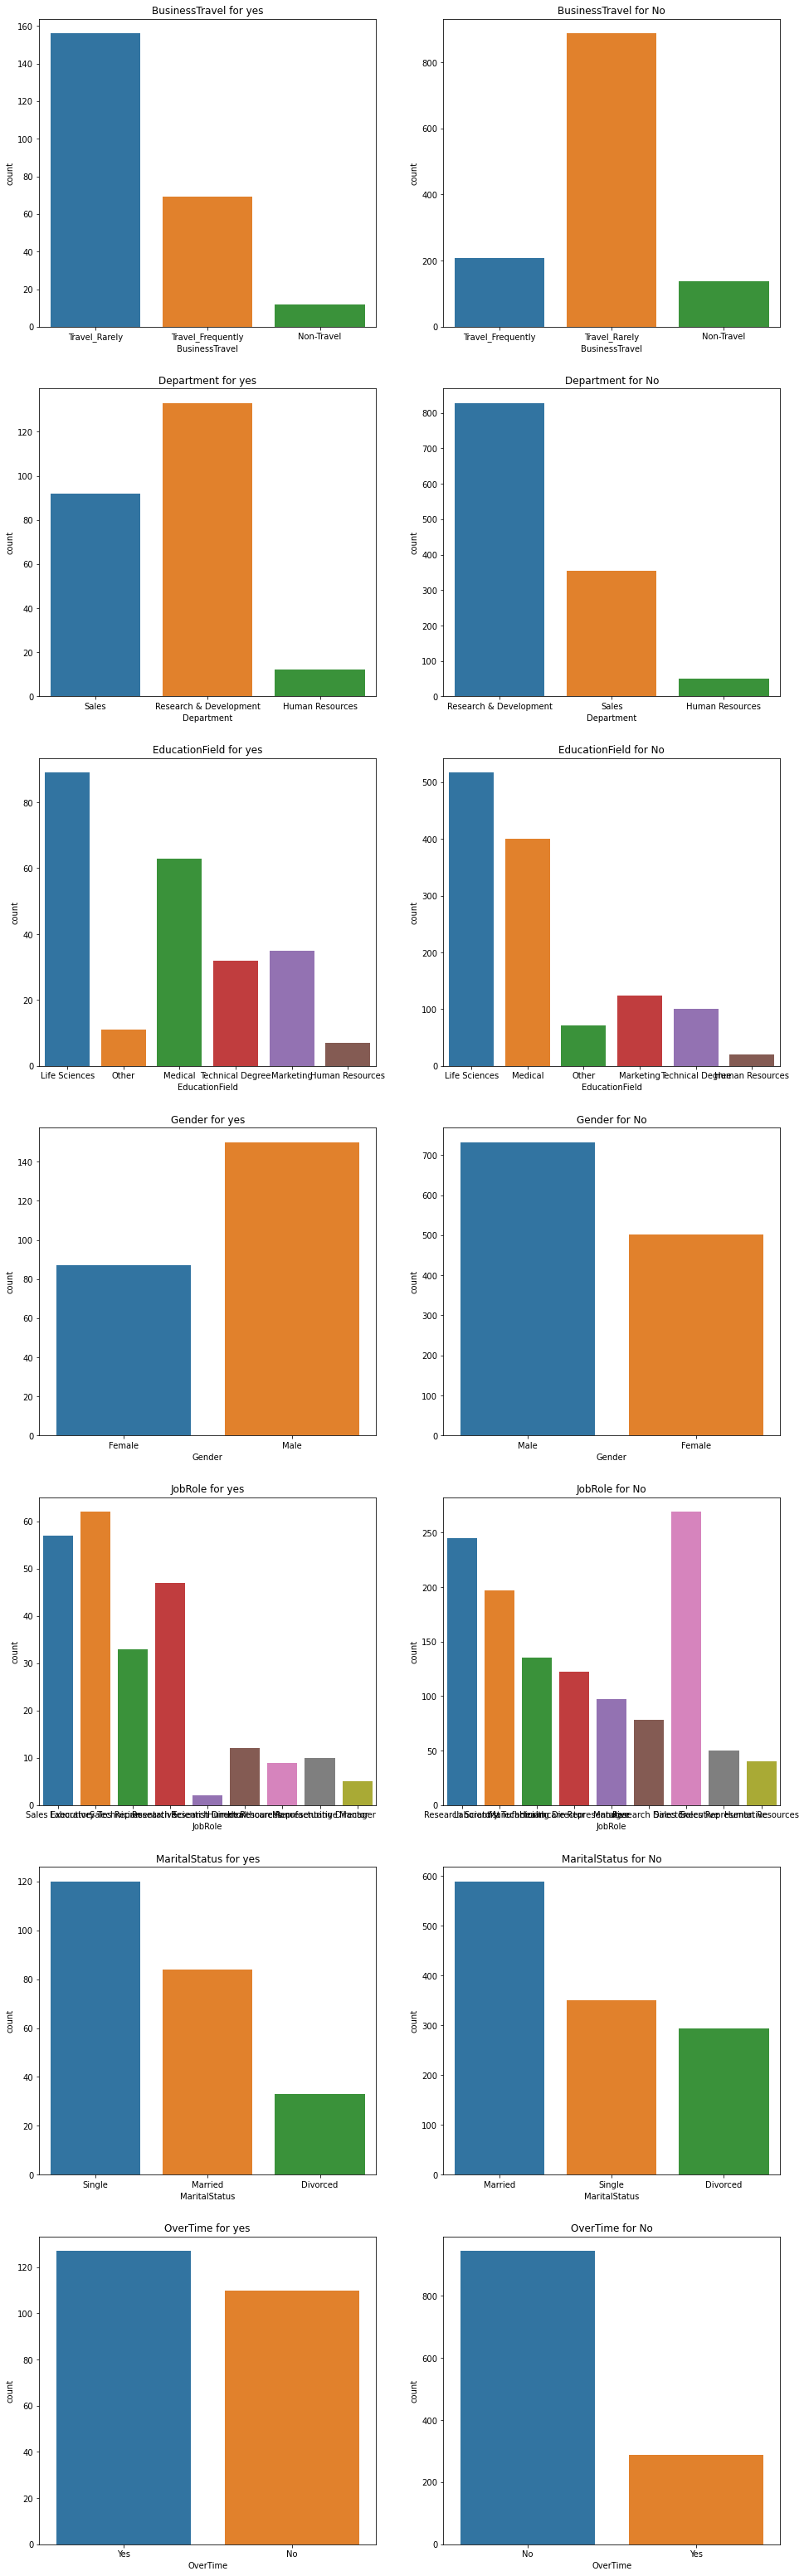

In [34]:
plt.figure(figsize=(16,56))
plotnumber  =1 
for col in cat_cols:
    plt.subplot(7,2, plotnumber)
    sns.countplot(att_yes[col])
    plt.title(f'{col} for yes')
    plotnumber+=1
    plt.subplot(7,2, plotnumber)
    sns.countplot(att_no[col])
    plt.title(f'{col} for No')
    plotnumber+=1

<strong>Married people are more likley to not leave the company, while single are more likley to leave</storng>

<strong>People doing overtime are more likley to stay in the company, while people not doing overtime are more likley to leave</strong>

<h3>Correlation Matrix</h3>

In [36]:
data.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  ...  \
Age                       0.509604        -0.004892       0.497855  ...   
DailyRate                 0.002966         0.030571       0.007

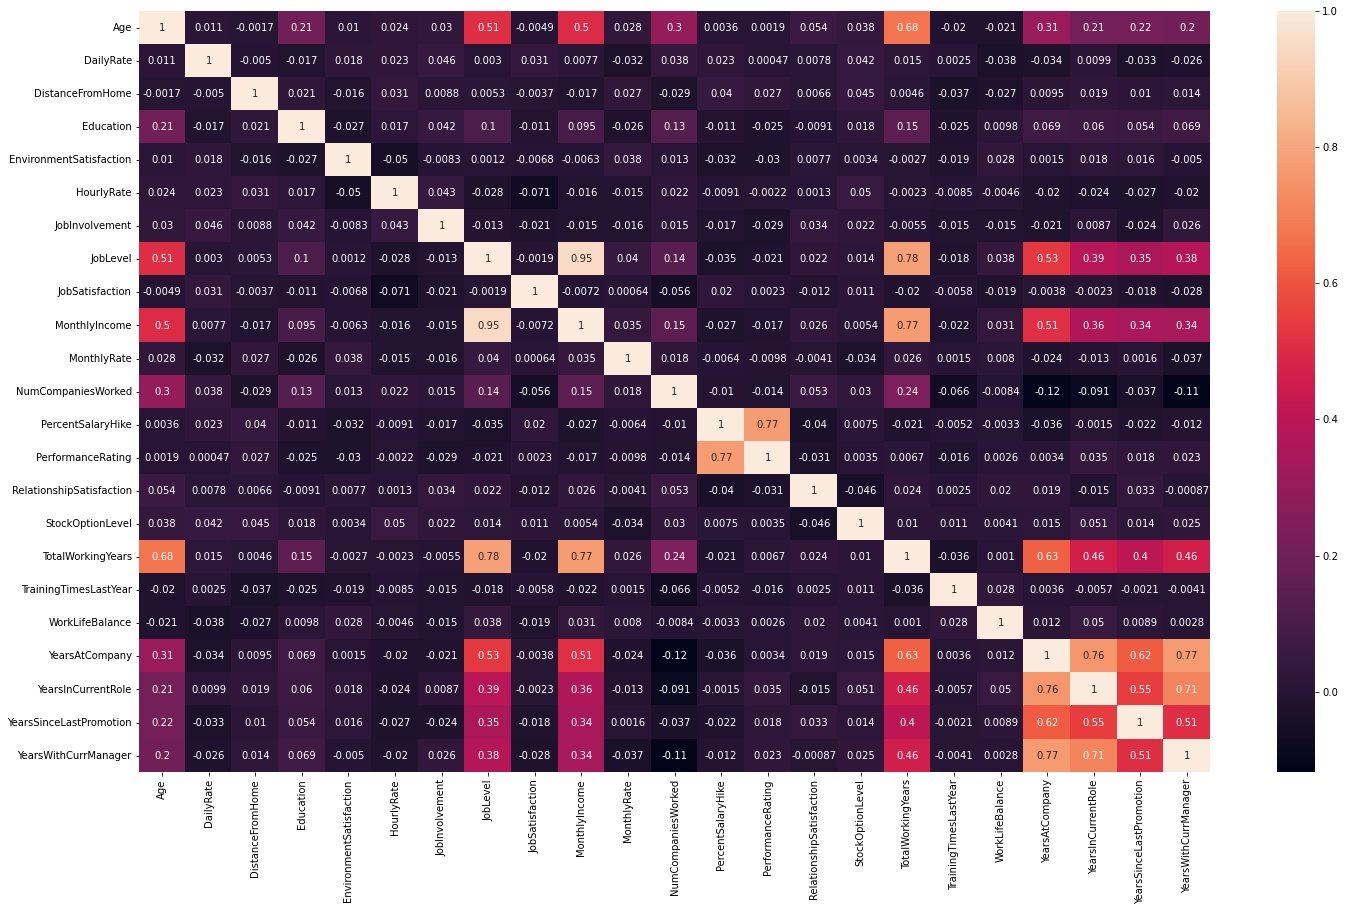

In [42]:
plt.figure(figsize=(24,14))
sns.heatmap(data.corr(), annot=True)

<ul>
    <li>MonthlyIncome has 95% correlation with JobLevel</li>
    <li>PerformanceRating has 77% with correlation wtih SalaryHike</li>
    <li>TotalWorkingYears have 78% correlation with jobLevel</li>
    <li>MonthlyIncome has 77% correaltion with TotalWorkingYears</li>
    <li>YearsinCompany havre 76% correlation with yearsincurrentRole</li>
    <li>YearswithCurrManager have 77% correlation with yearsAtCompany</li>
</ul>

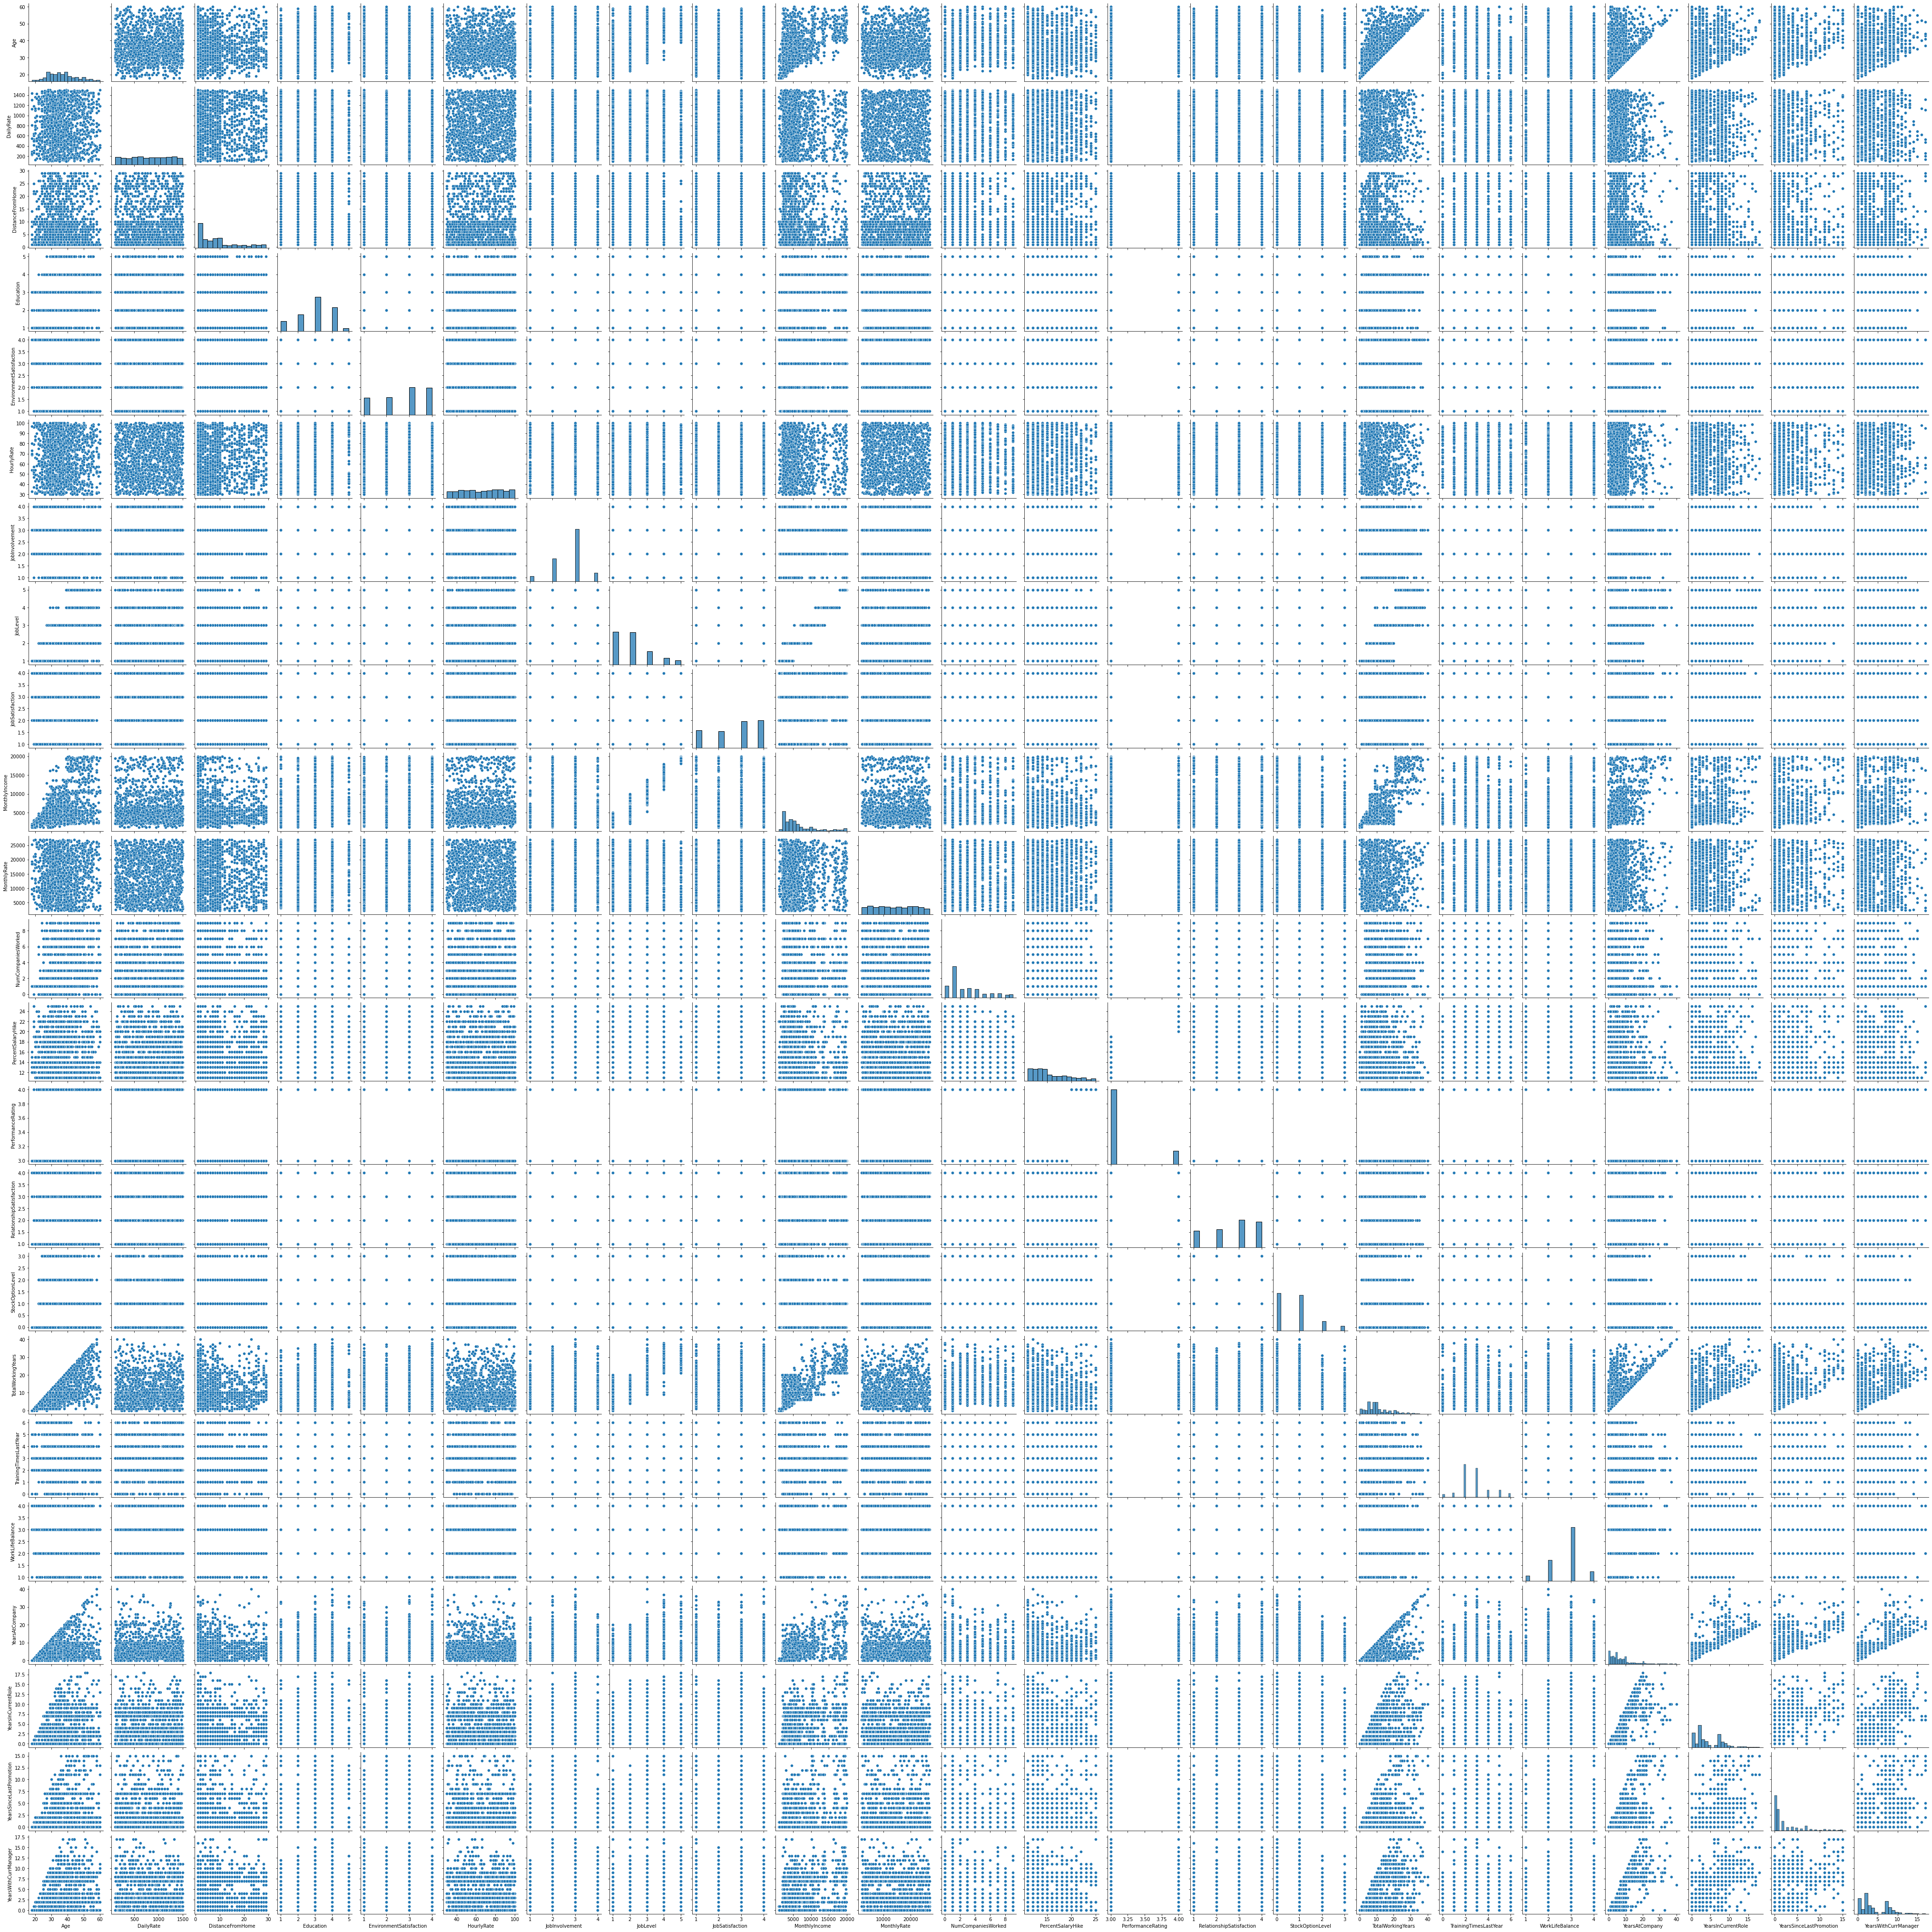

In [126]:
plt.figure(figsize=(20,20))
sns.pairplot(data)

<h3>Descriptive Statistics</h3>

In [43]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
count      1470.000000    1470.000000  ...        1470.000000   
mean          2.728571    6502.931293  ...           3.153741   
std           1.102846    4707.956783  ...           0.360824   
min           1.000000    1009.000000  ...           3.000000   
25%           2.000000    2911.000000  ...           3.000000   
50%           3.000000    4919.000000  ...           3.000000   
75%           4.000000    8379.000000  ...           3.000000   
max           4.000000   19999.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 23 columns]

<h3>Handling Outliers</h3>

<h4>Boxplot</h4>

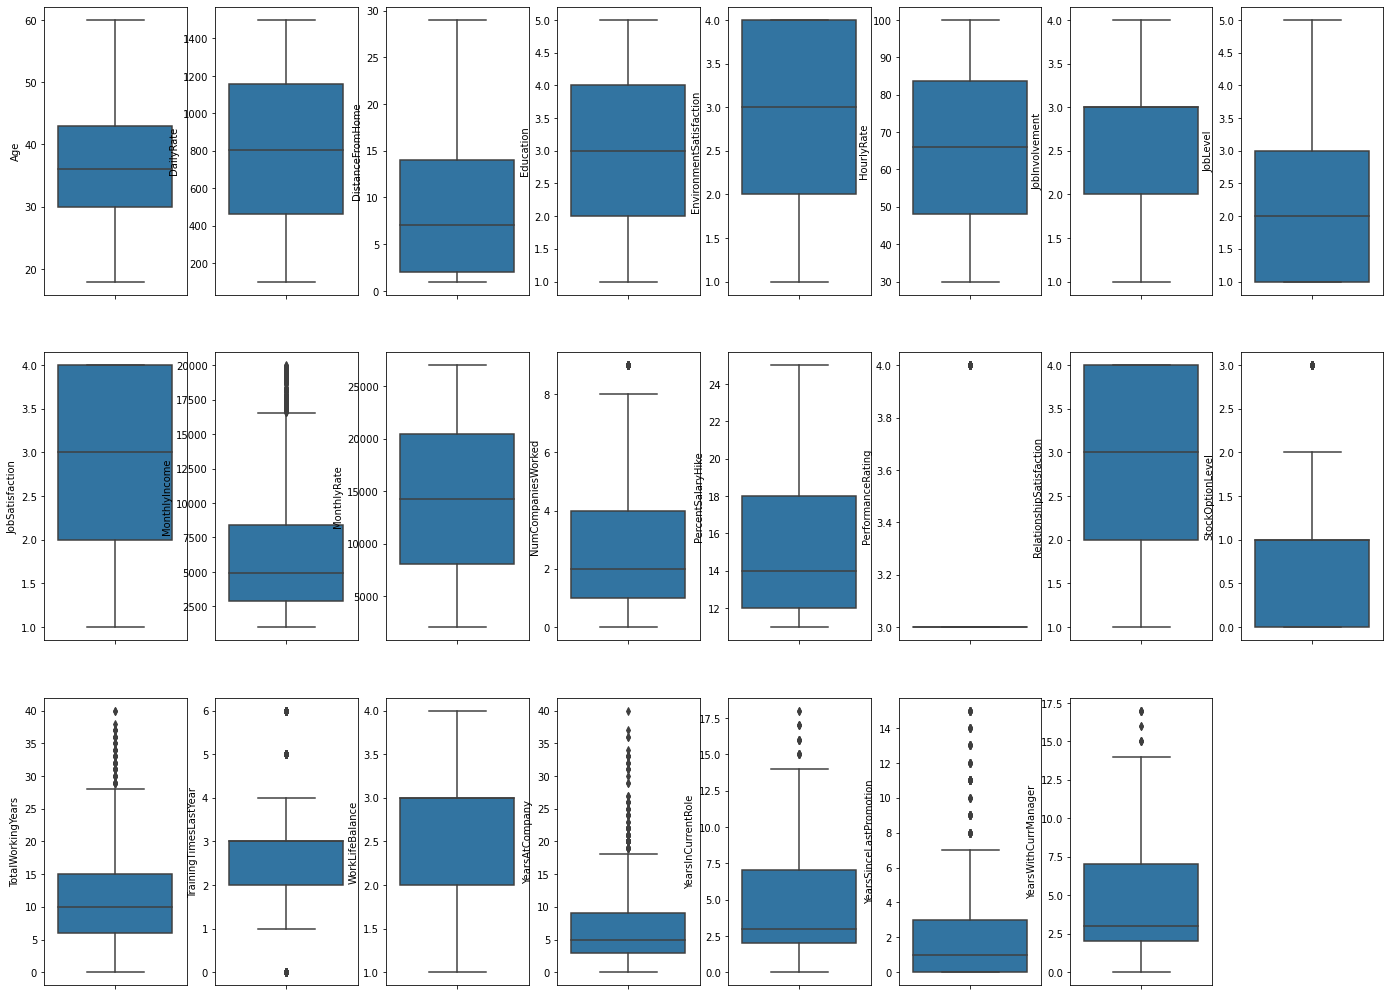

In [46]:
plt.figure(figsize=(24,18))
plotnumber = 1
for col in num_cols:
    plt.subplot(3,8,plotnumber)
    sns.boxplot(y=data[col])
    plotnumber+=1

Columns Having outliers -:
    MonthlyIncome, TotalWrokingYears, YearsAtCompany, YearsinCurrentRole, YearsSincePromtion

In [47]:
data.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

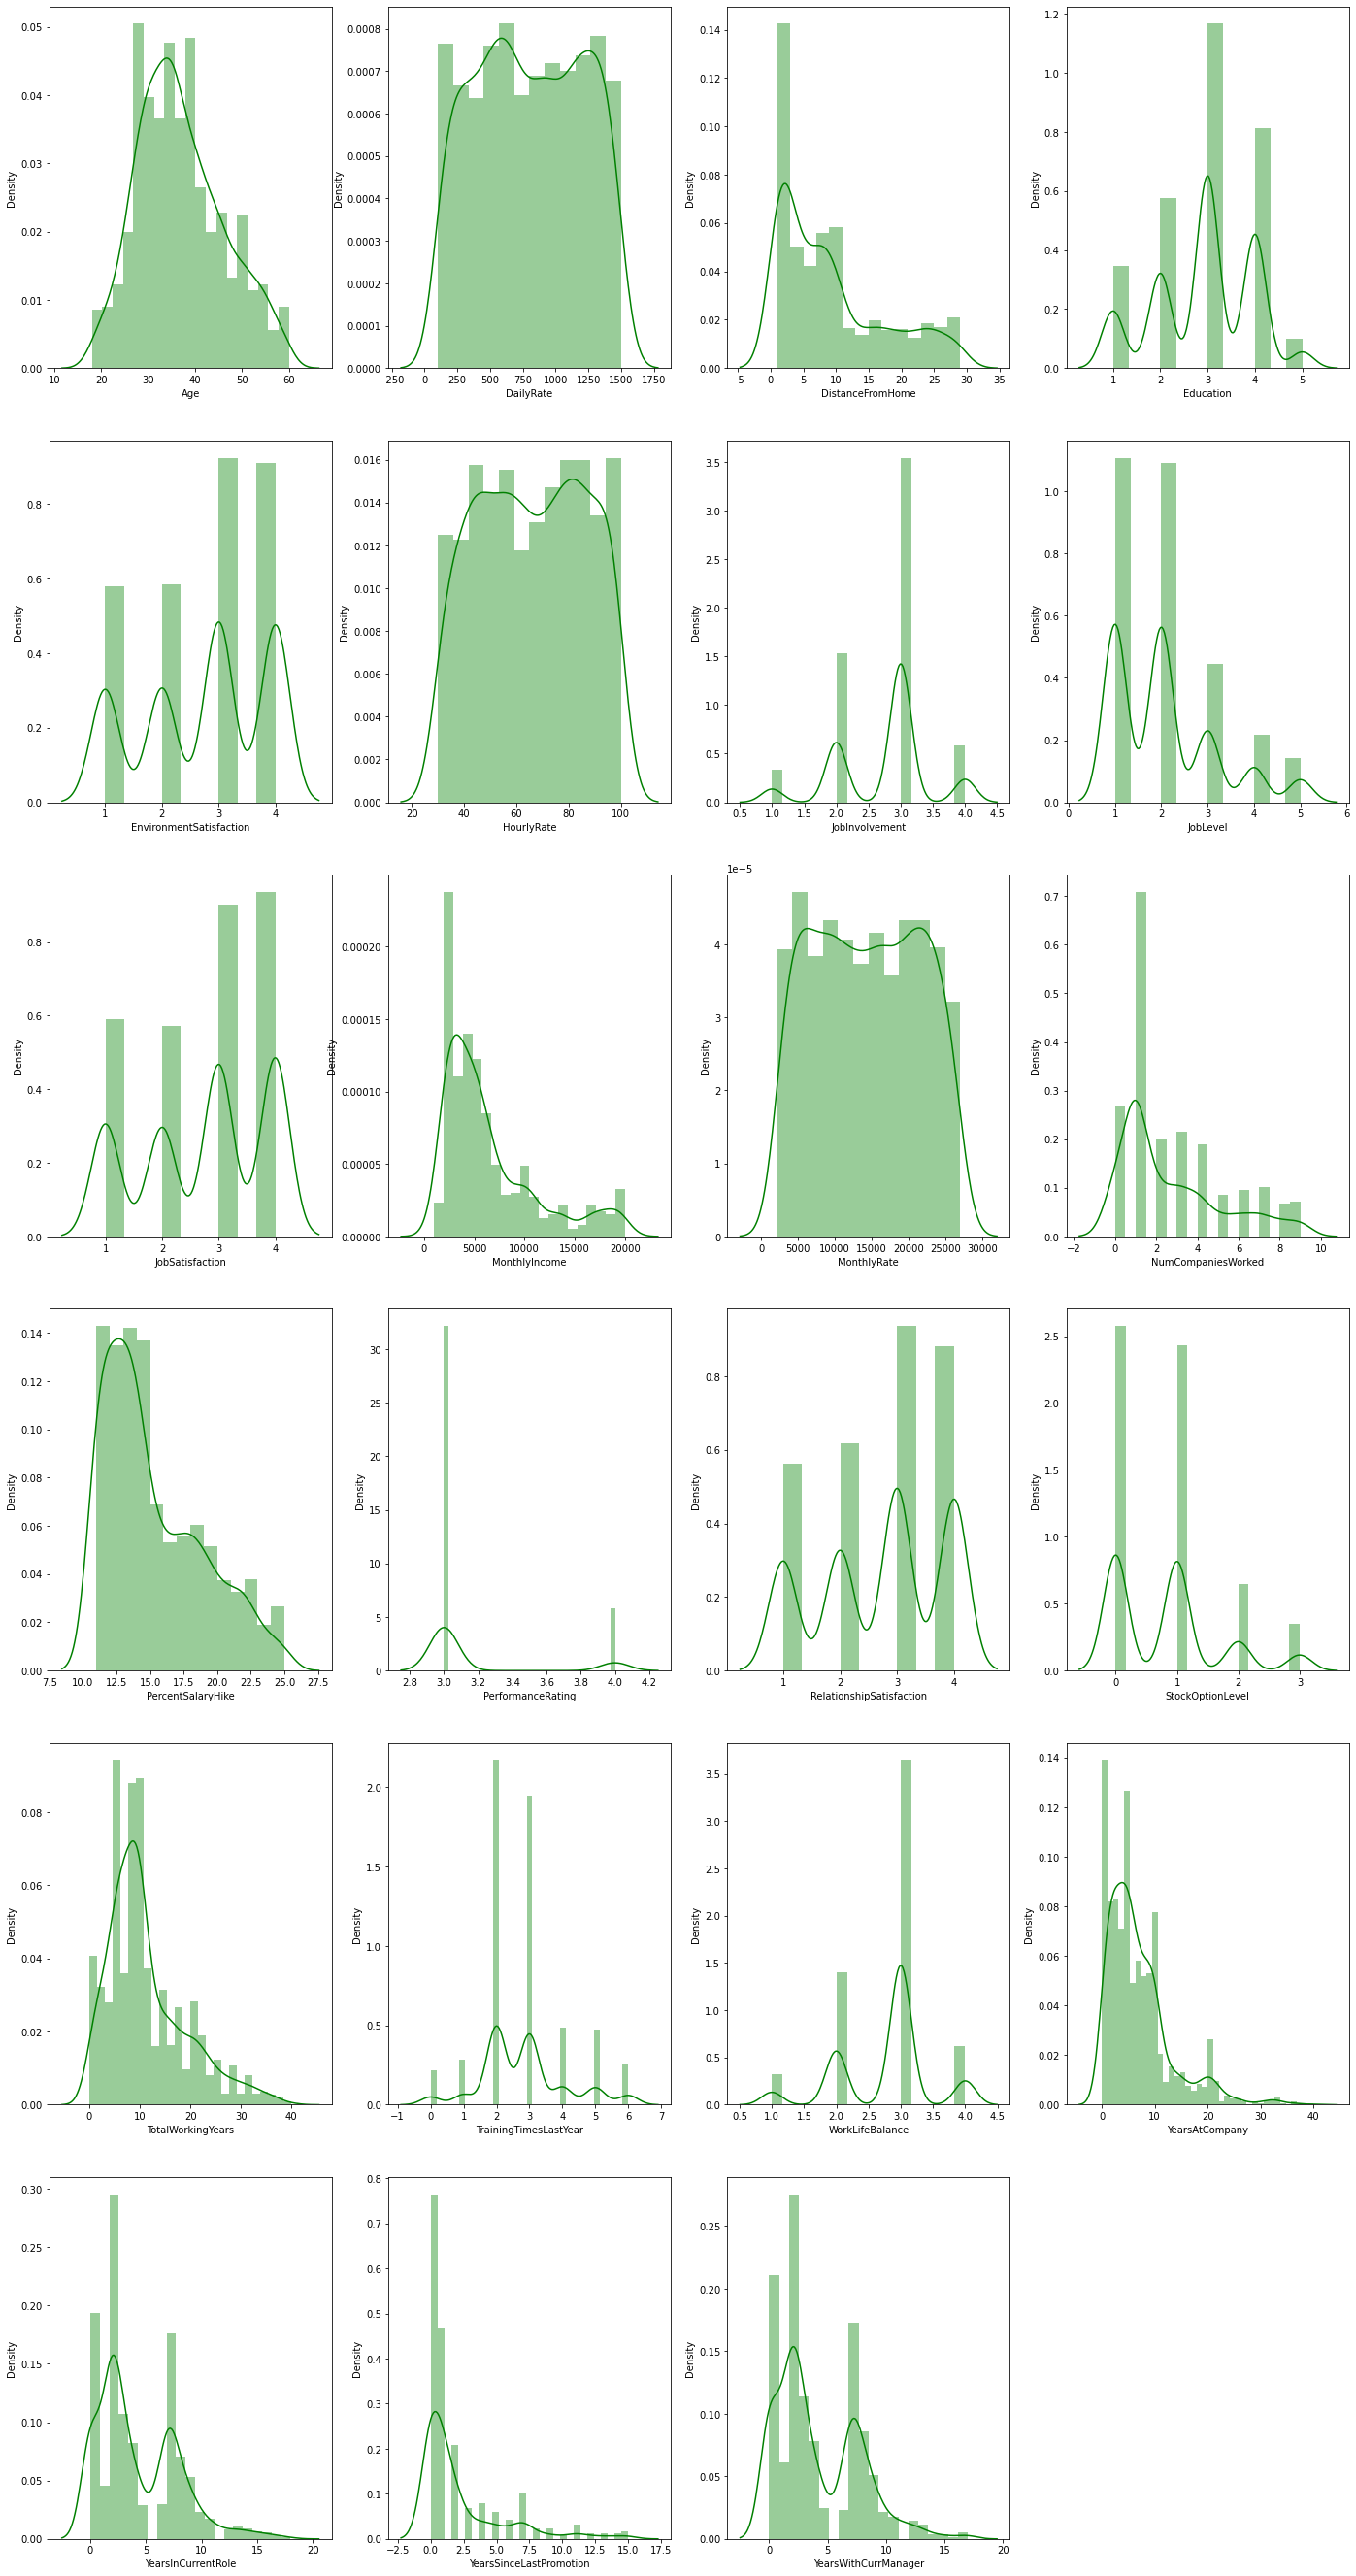

In [50]:
plt.figure(figsize=(24,48))
plotnumber = 1
for col in num_cols:
    plt.subplot(6,4,plotnumber)
    sns.distplot(data[col], color='green')
    plotnumber+=1

<b>using z-score technique</b>

In [62]:
X = data[num_cols]

from scipy.stats import zscore
z = np.abs(zscore(X))
print(z.shape)

data_new = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_new.shape)
print("Total Dropped Rows", data.shape[0] - data_new.shape[0])

(1470, 23)
Old Shape (1470, 31)
New Shape (1387, 31)
Total Dropped Rows 83


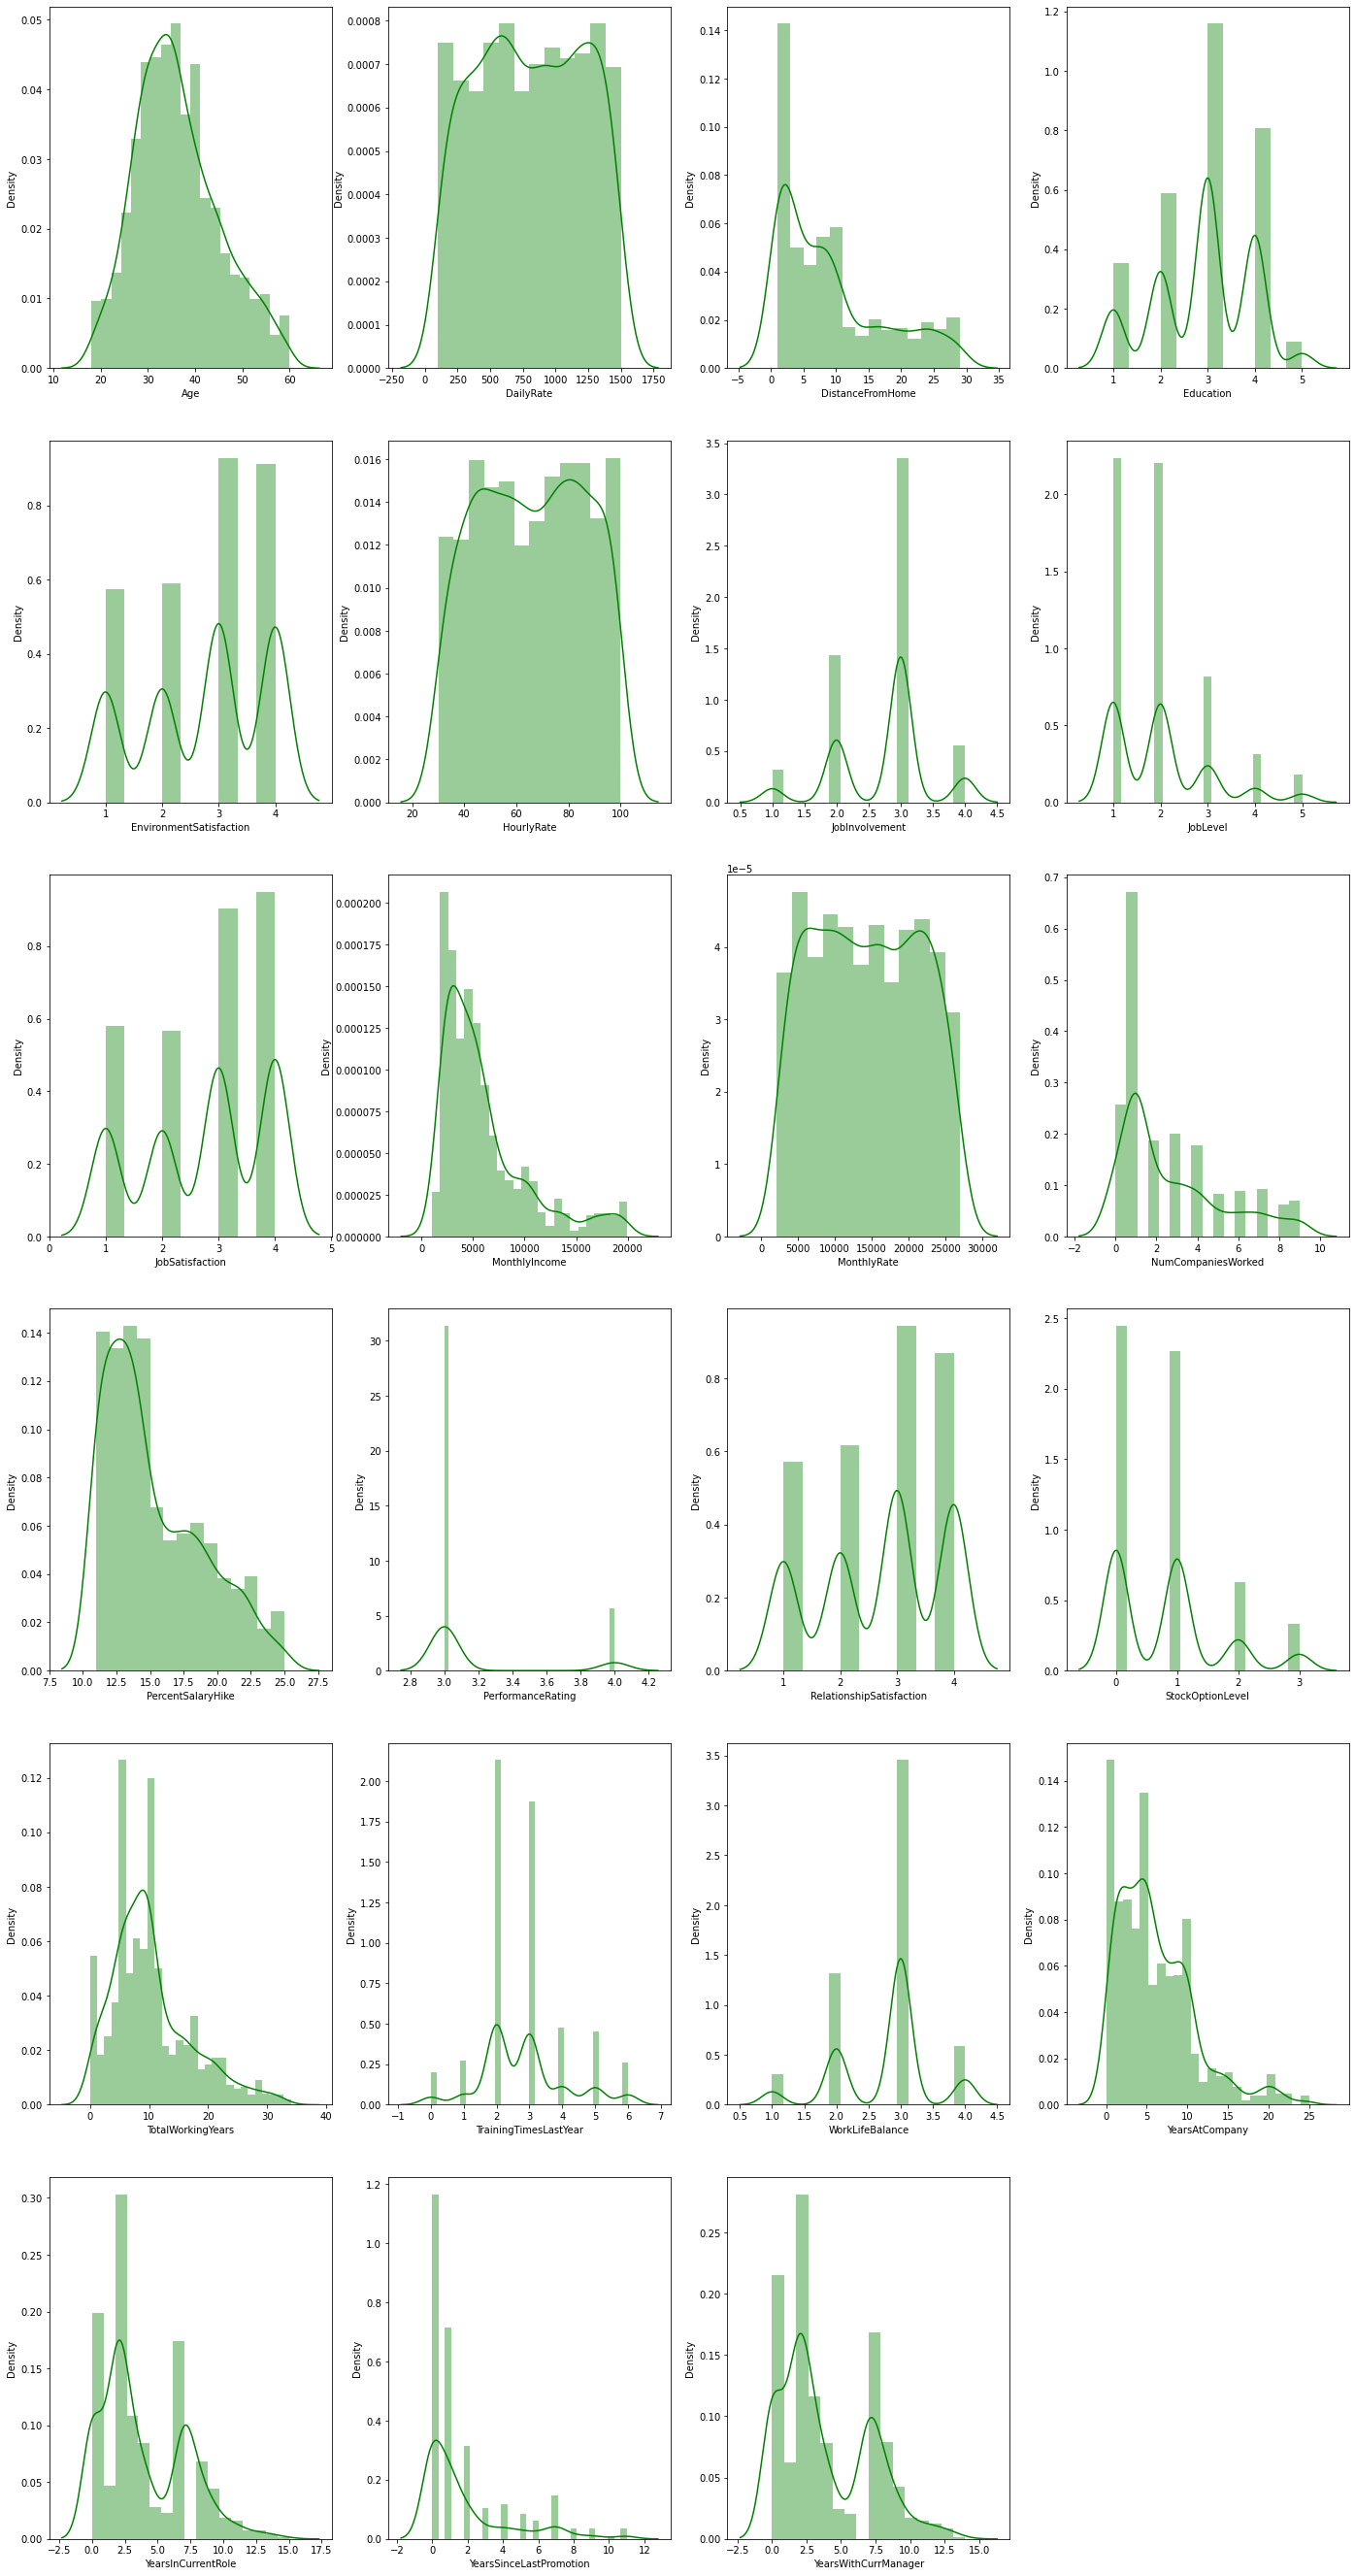

In [63]:
plt.figure(figsize=(24,48))
plotnumber = 1
for col in num_cols:
    plt.subplot(6,4,plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

In [64]:
data_new.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

<strong>We have brought down the skew slightly low</strong>

<h4>Power Transform</h4>

In [65]:
from sklearn.preprocessing import power_transform
X = data_new[num_cols]
for col in num_cols:
    data_new[col] = power_transform(np.array(data_new[col]).reshape(-1,1), method='yeo-johnson').reshape(1387,)


In [66]:
data_new['PerformanceRating']  = X['PerformanceRating']

In [67]:
data_new.skew()

Age                        -0.004079
DailyRate                  -0.199742
DistanceFromHome           -0.008149
Education                  -0.103747
EnvironmentSatisfaction    -0.205472
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobSatisfaction            -0.217730
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
PercentSalaryHike           0.112128
PerformanceRating           1.931566
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     0.212301
YearsWithCurrManager       -0.070570
dtype: float64

<strong>No skew left in the dataste now</strong>

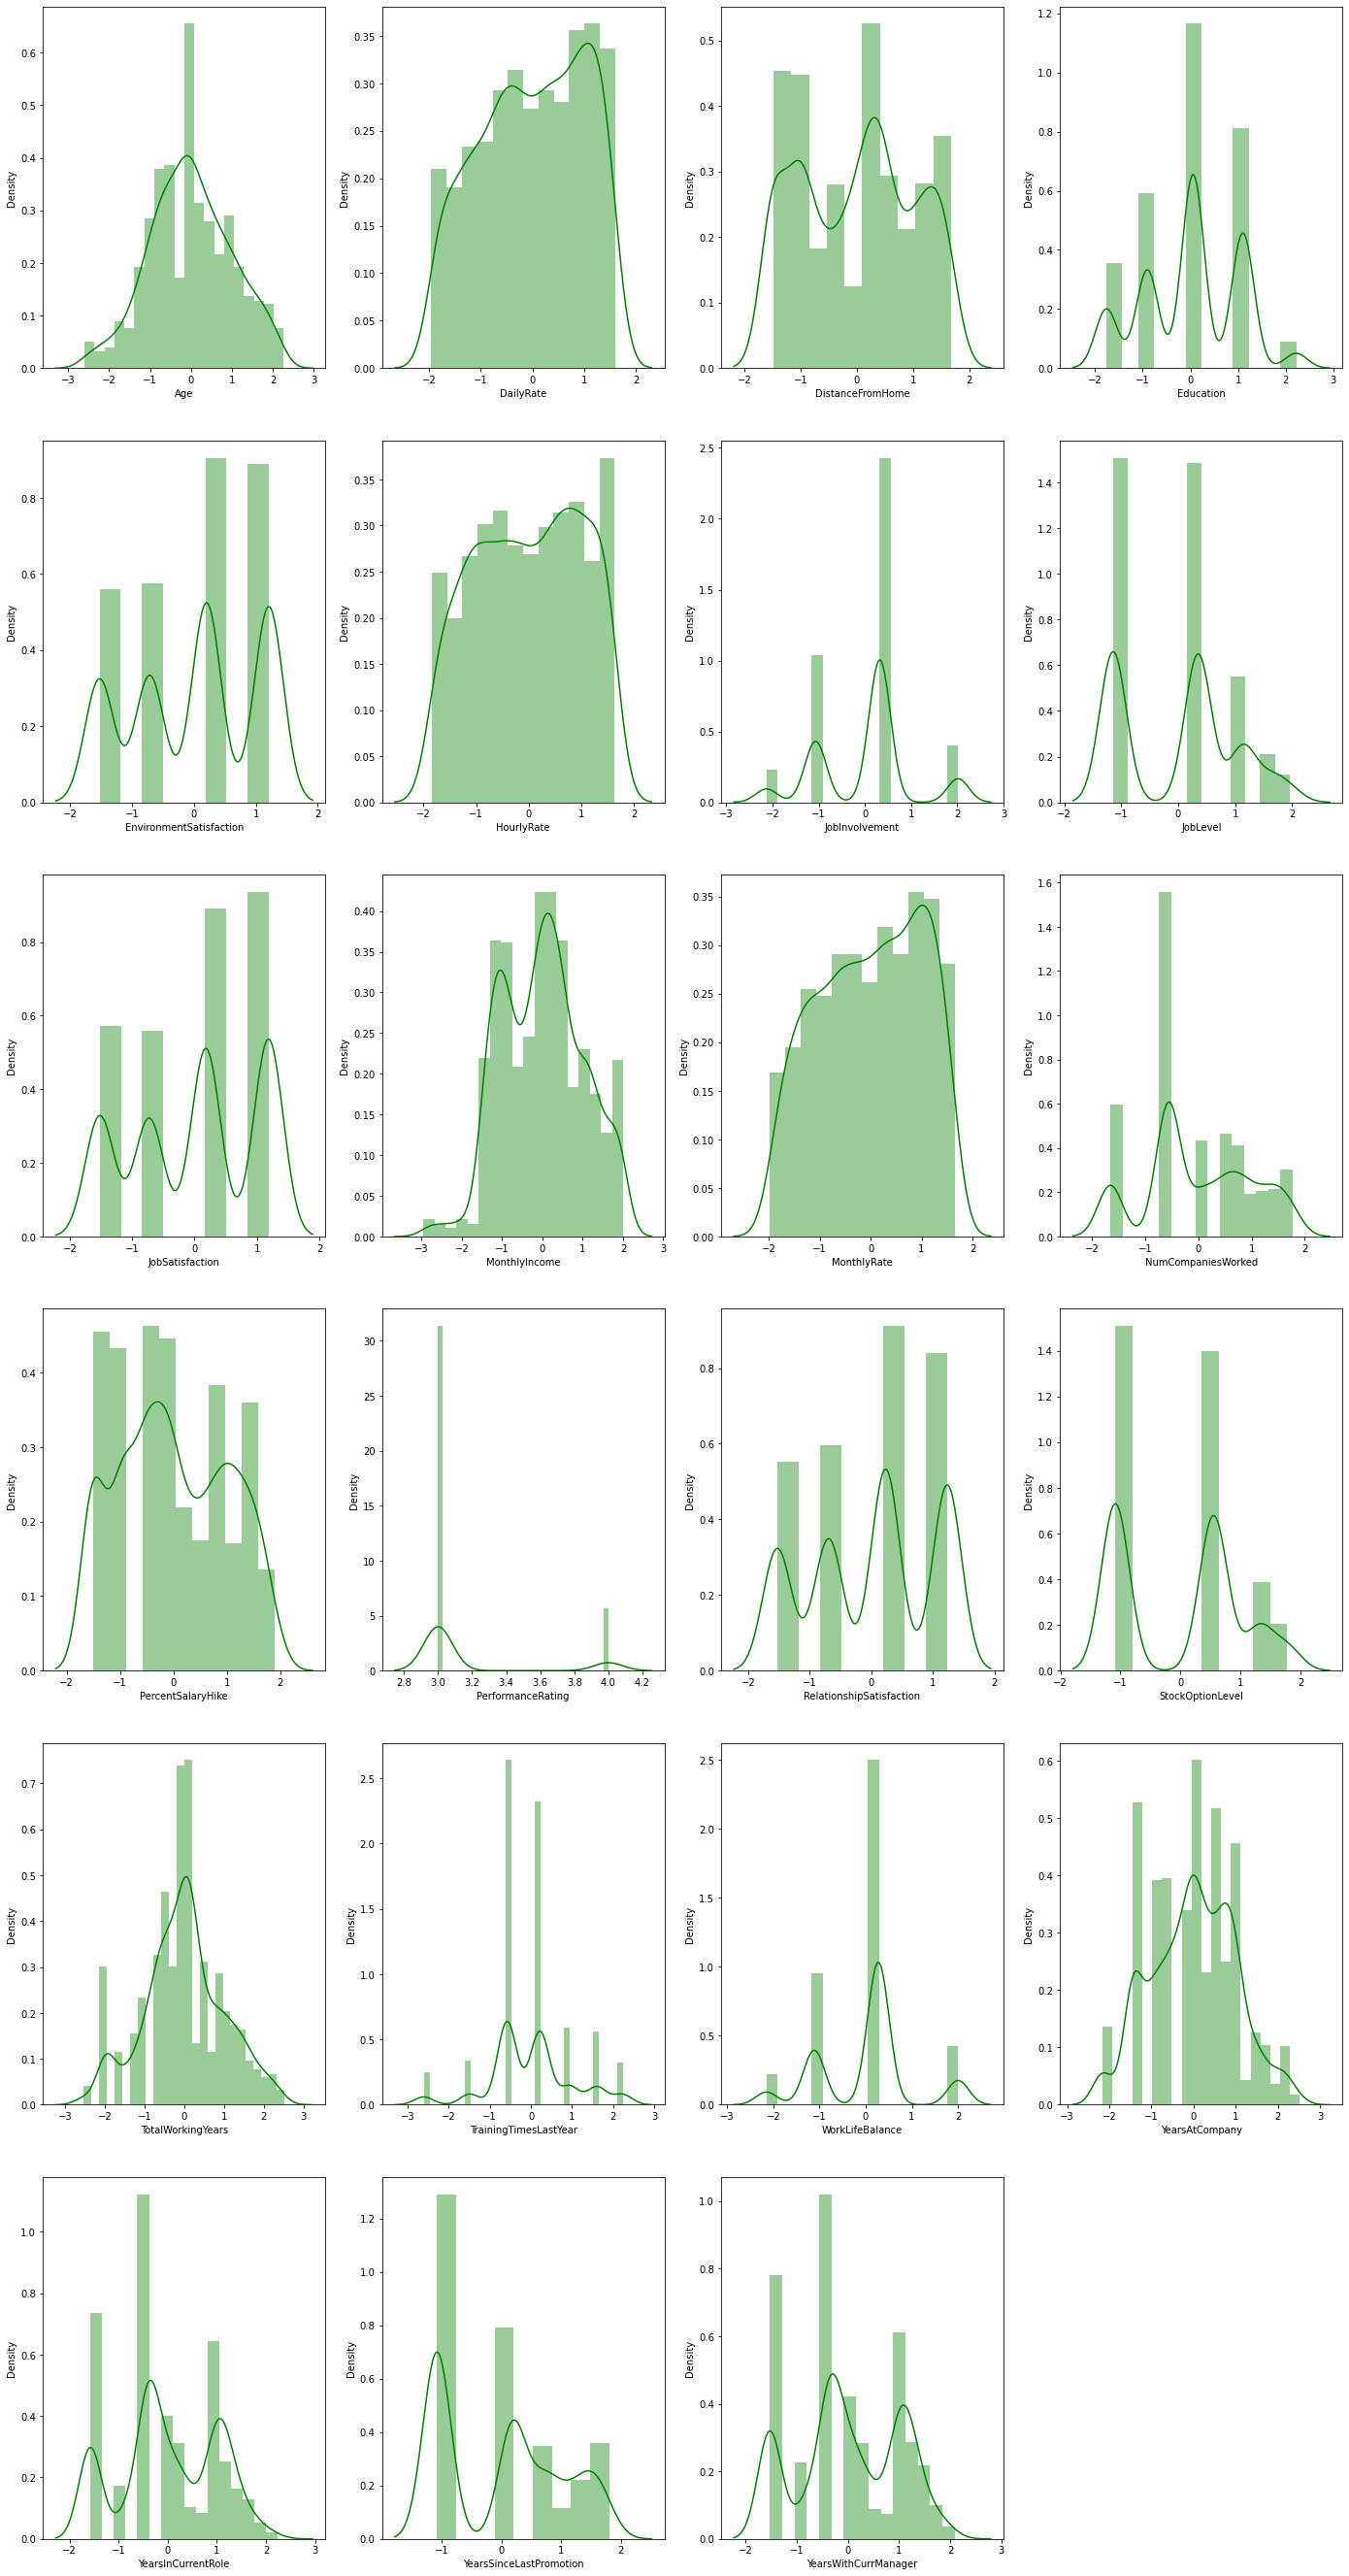

In [68]:
plt.figure(figsize=(24,48))
plotnumber = 1
for col in num_cols:
    plt.subplot(6,4,plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

<h4>Scaling the dataset</h4>

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for col in num_cols:
    data_new[col] = sc.fit_transform(np.array(data_new[col]).reshape(-1,1)).reshape(1387,)

In [70]:
data_new.mean()

Age                        -1.024575e-17
DailyRate                  -3.329869e-17
DistanceFromHome            1.536862e-17
Education                  -1.024575e-17
EnvironmentSatisfaction    -1.921078e-17
HourlyRate                  2.049150e-17
JobInvolvement             -4.098300e-17
JobLevel                   -2.177222e-17
JobSatisfaction            -1.536862e-17
MonthlyIncome               1.793006e-17
MonthlyRate                -4.098300e-17
NumCompaniesWorked         -4.866731e-17
PercentSalaryHike           1.793006e-17
PerformanceRating          -5.507090e-16
RelationshipSatisfaction   -4.098300e-17
StockOptionLevel            2.049150e-17
TotalWorkingYears           2.561437e-18
TrainingTimesLastYear       7.684312e-18
WorkLifeBalance             5.058839e-17
YearsAtCompany              3.457940e-17
YearsInCurrentRole          3.073725e-17
YearsSinceLastPromotion     3.842156e-17
YearsWithCurrManager       -2.113186e-17
dtype: float64

<strong>Mean is now close to zero for all variables</strong>

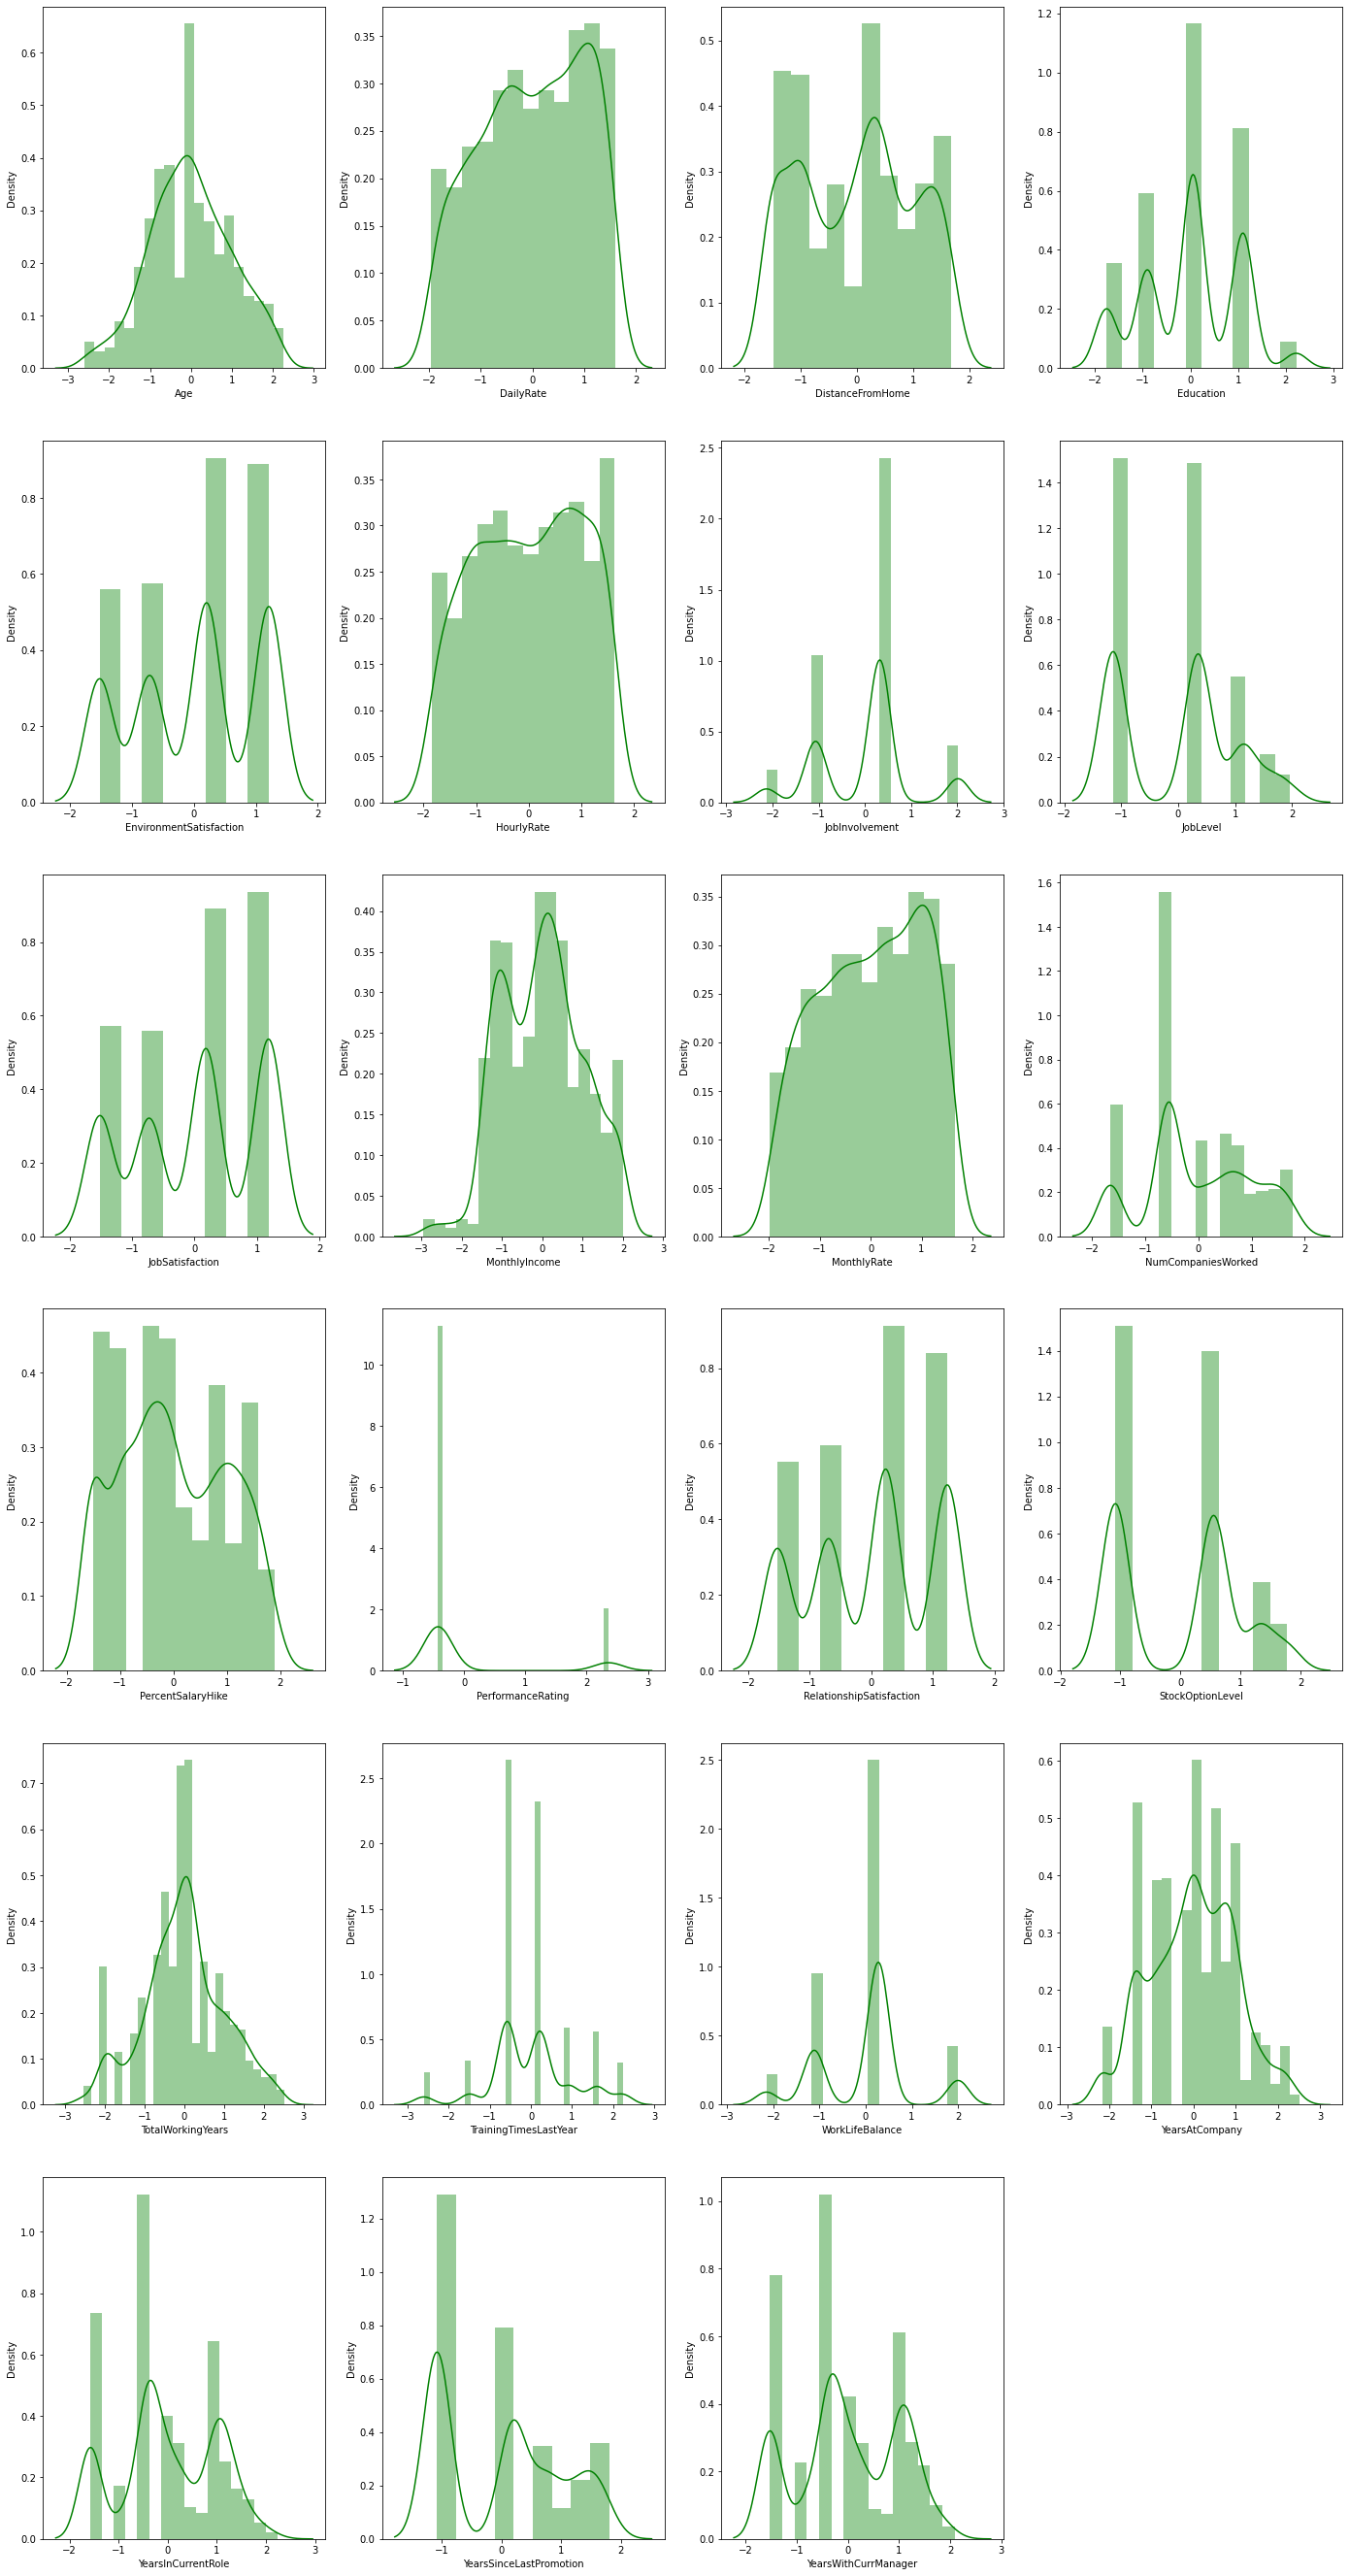

In [71]:
plt.figure(figsize=(24,48))
plotnumber = 1
for col in num_cols:
    plt.subplot(6,4,plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

<h3>Encoding using get dummies</h3>

In [104]:
X = data_new.drop(columns=['Attrition'])

X = pd.get_dummies(X, drop_first=True)

In [105]:
X.shape

(1387, 44)

In [106]:
X.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.610133   0.750615         -1.489968  -0.902402                -0.712215   
1  1.371830  -1.343372          0.244561  -1.759177                 0.204826   
2  0.182486   1.337080         -1.028366  -0.902402                 1.210036   
3 -0.284736   1.377080         -0.698191   1.102042                 1.210036   
4 -1.080489  -0.467301         -1.028366  -1.759177                -1.522916   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0    1.359498        0.322170  0.349828         1.186326       0.386674  ...   
1   -0.208763       -1.065841  0.349828        -0.725589       0.144235  ...   
2    1.267832       -1.065841 -1.141761         0.181993      -1.431153  ...   
3   -0.458919        0.322170 -1.141761         0.181993      -0.814425  ...   
4   -1.290538        0.322170 -1.141761        -0.725589      -0.504453  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                             0                      0                     1   
1                             0                      1                     0   
2                             0                      0                     1   
3                             0                      1                     0   
4                             0                      1                     0   

   OverTime_Yes  
0             1  
1             0  
2             1  
3             1  
4             0  

[5 rows x 44 columns]

<h3>Multicollinearity usnig VIF</h3>

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X[num_cols].values, i) for i in range(X[num_cols].shape[1])]
vif["Features"] = X[num_cols].columns
vif.nlargest(17, 'vif')

vif                 Features
19  6.264847           YearsAtCompany
9   5.825104            MonthlyIncome
7   5.661148                 JobLevel
16  4.000594        TotalWorkingYears
20  3.490014       YearsInCurrentRole
22  3.422543     YearsWithCurrManager
0   1.923713                      Age
12  1.752241        PercentSalaryHike
13  1.742651        PerformanceRating
11  1.421929       NumCompaniesWorked
21  1.370361  YearsSinceLastPromotion
3   1.061729                Education
15  1.027410         StockOptionLevel
1   1.020682                DailyRate
5   1.019820               HourlyRate
10  1.019324              MonthlyRate
6   1.017871           JobInvolvement

In [108]:
X = X.drop(columns=['YearsAtCompany'])
num_cols.remove('YearsAtCompany')
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X[num_cols].values, i) for i in range(X[num_cols].shape[1])]
vif["Features"] = X[num_cols].columns
vif.nlargest(17, 'vif')

vif                 Features
9   5.825043            MonthlyIncome
7   5.657247                 JobLevel
16  3.720652        TotalWorkingYears
19  2.416287       YearsInCurrentRole
21  2.404424     YearsWithCurrManager
0   1.921781                      Age
12  1.744447        PercentSalaryHike
13  1.740531        PerformanceRating
20  1.364018  YearsSinceLastPromotion
11  1.330556       NumCompaniesWorked
3   1.061301                Education
15  1.027335         StockOptionLevel
1   1.020074                DailyRate
5   1.019817               HourlyRate
6   1.017463           JobInvolvement
10  1.017371              MonthlyRate
4   1.017272  EnvironmentSatisfaction

In [109]:
X = X.drop(columns=['MonthlyIncome'])
num_cols.remove('MonthlyIncome')
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X[num_cols].values, i) for i in range(X[num_cols].shape[1])]
vif["Features"] = X[num_cols].columns
vif.nlargest(17, 'vif')

vif                  Features
15  3.590495         TotalWorkingYears
18  2.406247        YearsInCurrentRole
20  2.401277      YearsWithCurrManager
7   2.032644                  JobLevel
0   1.921775                       Age
11  1.743532         PercentSalaryHike
12  1.737947         PerformanceRating
19  1.363934   YearsSinceLastPromotion
10  1.330376        NumCompaniesWorked
3   1.061185                 Education
14  1.027335          StockOptionLevel
1   1.019423                 DailyRate
5   1.019248                HourlyRate
6   1.017301            JobInvolvement
9   1.017230               MonthlyRate
4   1.014875   EnvironmentSatisfaction
13  1.014029  RelationshipSatisfaction

<strong>No multicollinearity problem now</strong>

In [110]:
X.shape

(1387, 42)

In [111]:
y = data_new['Attrition']
y = y.replace({'Yes':1, 'No':0})

<h4>OverSampling</h4>

In [112]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

<h3>Building and Training Models</h3>

In [113]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, confusion_matrix, classification_report

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [115]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1621, 42)
(695, 42)
(1621,)
(695,)


<h3>Logistic Regression</h3>

In [116]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8994447871684146
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       829
           1       0.88      0.92      0.90       792

    accuracy                           0.90      1621
   macro avg       0.90      0.90      0.90      1621
weighted avg       0.90      0.90      0.90      1621


Testing Accuracy : 0.8618705035971223
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       382
           1       0.83      0.88      0.85       313

    accuracy                           0.86       695
   macro avg       0.86      0.86      0.86       695
weighted avg       0.86      0.86      0.86       695



Text(33.0, 0.5, 'Predicted')

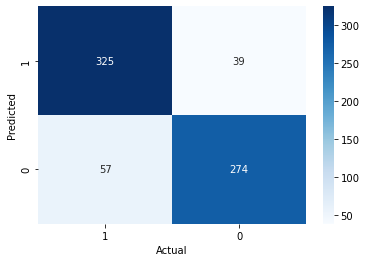

In [119]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

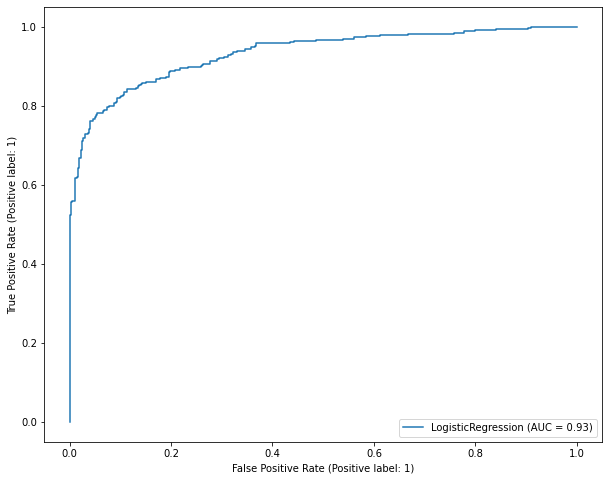

In [120]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)

<h4>HyperParameter Tuning</h4>

In [121]:
lrcv  = LogisticRegression()
grid_param = {
    'penalty':['l2'],
    'dual':[True, False],
    'max_iter':np.arange(100, 4000, 200),
    'fit_intercept':[True, False],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

grid_lr = GridSearchCV(lrcv, param_grid = grid_param, cv=3, n_jobs=-1, verbose=True)
grid_lr.fit(X_train, y_train)
print('Best Score:', grid_lr.best_score_)
print('Best Params:', grid_lr.best_params_)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Best Score: 0.8821752127975172
Best Params: {'dual': False, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


Building model with best Parameters

In [128]:
lrcv = LogisticRegression(solver='newton-cg')

lrcv.fit(X_train, y_train)

y_pred_train = lrcv.predict(X_train)
y_pred_test = lrcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8994447871684146
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       829
           1       0.88      0.92      0.90       792

    accuracy                           0.90      1621
   macro avg       0.90      0.90      0.90      1621
weighted avg       0.90      0.90      0.90      1621


Testing Accuracy : 0.8618705035971223
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       382
           1       0.83      0.88      0.85       313

    accuracy                           0.86       695
   macro avg       0.86      0.86      0.86       695
weighted avg       0.86      0.86      0.86       695



Text(33.0, 0.5, 'Predicted')

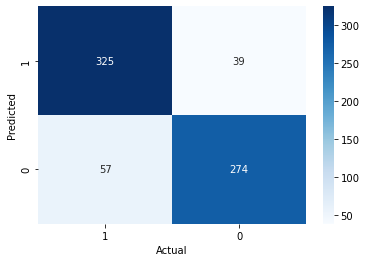

In [129]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

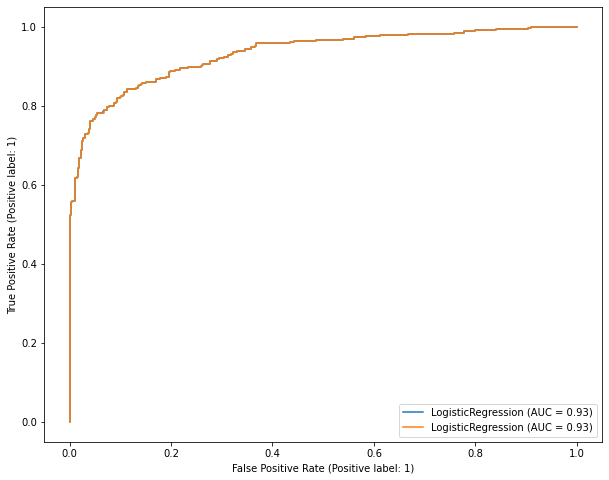

In [125]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)

<h3>KNeighborsClassifier</h3>

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8605798889574336
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.72      0.99      0.84       576
           1       1.00      0.79      0.88      1045

    accuracy                           0.86      1621
   macro avg       0.86      0.89      0.86      1621
weighted avg       0.90      0.86      0.86      1621


Testing Accuracy : 0.7654676258992805
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.56      0.98      0.72       209
           1       0.99      0.67      0.80       486

    accuracy                           0.77       695
   macro avg       0.78      0.83      0.76       695
weighted avg       0.86      0.77      0.77       695



Text(33.0, 0.5, 'Predicted')

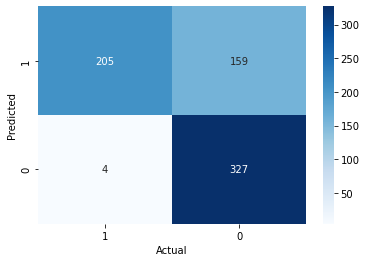

In [131]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

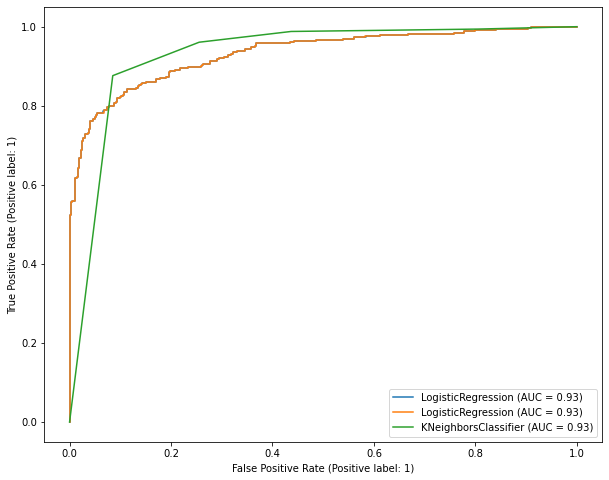

In [132]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)

<h4>HyperParameter Tuning</h4>

In [135]:
knncv = KNeighborsClassifier()

grid_param = {
    'n_neighbors':[3,5,7,9,11,13,15],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[4,7,9,11,13,15,17,21],
    'p':[1,2,3],
    'n_jobs':[-1]
}

grid_knn = GridSearchCV(knncv, param_grid=grid_param, n_jobs=-1, cv=3, verbose=3)
grid_knn.fit(X_train, y_train)
print('Best Score:', grid_knn.best_score_)
print('Best Params:', grid_knn.best_params_)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits
Best Score: 0.8550238470139888
Best Params: {'algorithm': 'auto', 'leaf_size': 4, 'n_jobs': -1, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


Building model with best Params

In [136]:
knncv = KNeighborsClassifier(leaf_size=4, n_neighbors=3, p=1, weights='distance')
knncv.fit(X_train, y_train)

y_pred_train = knncv.predict(X_train)
y_pred_test = knncv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       794
           1       1.00      1.00      1.00       827

    accuracy                           1.00      1621
   macro avg       1.00      1.00      1.00      1621
weighted avg       1.00      1.00      1.00      1621


Testing Accuracy : 0.8546762589928057
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.74      0.98      0.84       275
           1       0.98      0.77      0.87       420

    accuracy                           0.85       695
   macro avg       0.86      0.88      0.85       695
weighted avg       0.89      0.85      0.86       695



Text(33.0, 0.5, 'Predicted')

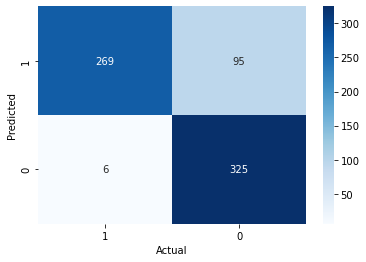

In [137]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

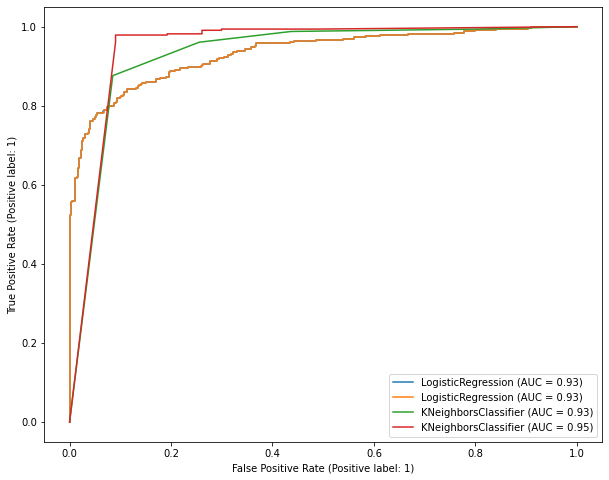

In [138]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)
plot_roc_curve(knncv, X_test, y_test, ax=ax)

<strong>HyperParamter Tuned KNN is performig best</strong>

<h3>DecisionTreeClassifier</h3>

In [139]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       794
           1       1.00      1.00      1.00       827

    accuracy                           1.00      1621
   macro avg       1.00      1.00      1.00      1621
weighted avg       1.00      1.00      1.00      1621


Testing Accuracy : 0.823021582733813
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       377
           1       0.79      0.83      0.81       318

    accuracy                           0.82       695
   macro avg       0.82      0.82      0.82       695
weighted avg       0.82      0.82      0.82       695



Text(33.0, 0.5, 'Predicted')

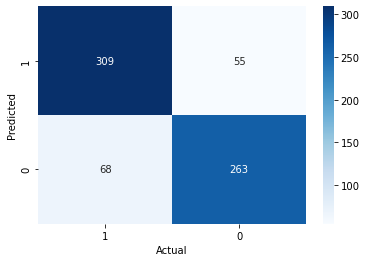

In [140]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

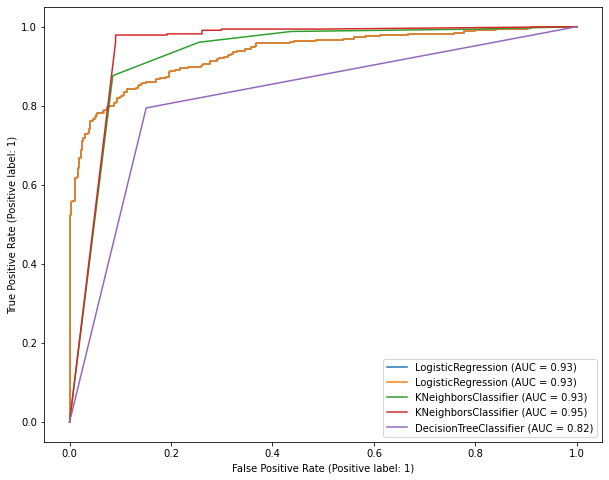

In [141]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)
plot_roc_curve(knncv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)

<h4>HyperParameter Tuning</h4>

In [144]:
dtcv = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth':[8,9,10,11,12,13,14,15],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[3,4,5, 6,7],
    'max_leaf_nodes':[30,35,40,45,50,55,60]
}

grid_dt = GridSearchCV(dtcv, param_grid=grid_param, cv=3, n_jobs=-1)
grid_dt.fit(X_train, y_train)

print('Best Score:', grid_dt.best_score_)
print('Best Params:', grid_dt.best_params_)

Best Score: 0.8377581524839689
Best Params: {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 50, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


Building model with best parameters

In [147]:
dtcv = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=2, splitter='best')

dtcv.fit(X_train, y_train)

y_pred_train = dtcv.predict(X_train)
y_pred_test = dtcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.904996915484269
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       842
           1       0.88      0.93      0.90       779

    accuracy                           0.90      1621
   macro avg       0.91      0.91      0.90      1621
weighted avg       0.91      0.90      0.91      1621


Testing Accuracy : 0.8359712230215828
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       388
           1       0.79      0.85      0.82       307

    accuracy                           0.84       695
   macro avg       0.83      0.84      0.83       695
weighted avg       0.84      0.84      0.84       695



Text(33.0, 0.5, 'Predicted')

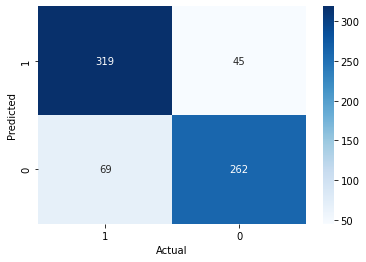

In [148]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

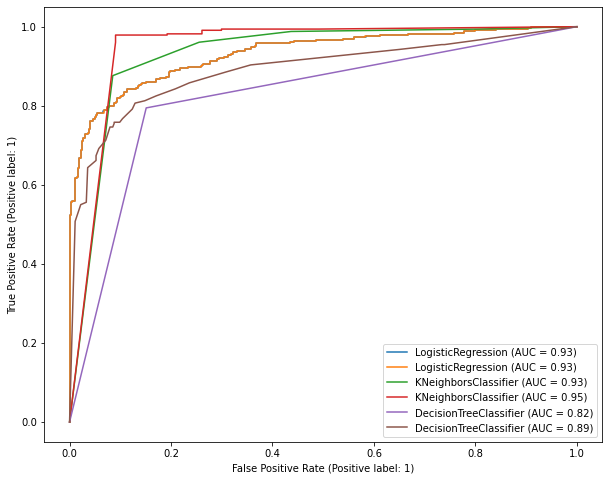

In [149]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)
plot_roc_curve(knncv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)

<strong>KNN Model is still the best performing Model</strong>

<h3>RandomForest Classifier</h3>

In [150]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       794
           1       1.00      1.00      1.00       827

    accuracy                           1.00      1621
   macro avg       1.00      1.00      1.00      1621
weighted avg       1.00      1.00      1.00      1621


Testing Accuracy : 0.9266187050359712
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       381
           1       0.90      0.95      0.92       314

    accuracy                           0.93       695
   macro avg       0.93      0.93      0.93       695
weighted avg       0.93      0.93      0.93       695



Text(33.0, 0.5, 'Predicted')

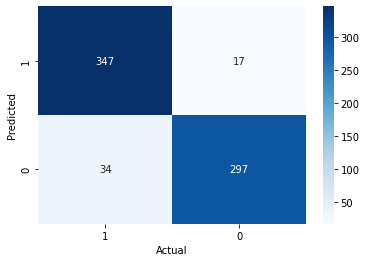

In [151]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

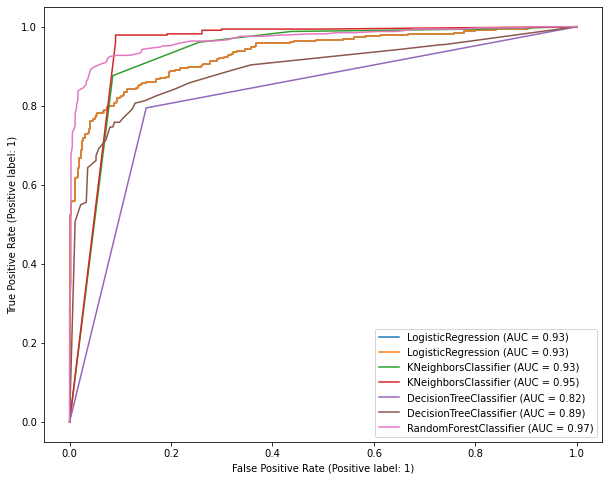

In [152]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)
plot_roc_curve(knncv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)

<h4>HyperParameter Tuning</h4>

In [156]:
rfcv = RandomForestClassifier()

grid_param = {
    'n_estimators':[100,200,250],
    'criterion':['gini', 'entropy'],
    'max_depth':[None,9,10,11],
    'min_samples_split':[3,4,5],
    'min_samples_leaf':[3,4,5],
    'max_leaf_nodes':[None,50,55,60],
    'n_jobs':[-1]
}

grid_rf = GridSearchCV(rfcv, param_grid = grid_param, cv=3, n_jobs=-1,verbose=3)
grid_rf.fit(X_train, y_train)

print('Best Score:', grid_rf.best_score_)
print('Best Params:', grid_rf.best_params_)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Best Score: 0.9216642705552133
Best Params: {'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}


Building Model with best Params

In [159]:
rfcv = RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=3, min_samples_split=5, n_estimators=200)

rfcv.fit(X_train, y_train)

y_pred_train = rfcv.predict(X_train)
y_pred_test = rfcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9913633559531153
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       808
           1       0.98      1.00      0.99       813

    accuracy                           0.99      1621
   macro avg       0.99      0.99      0.99      1621
weighted avg       0.99      0.99      0.99      1621


Testing Accuracy : 0.9122302158273381
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       379
           1       0.89      0.93      0.91       316

    accuracy                           0.91       695
   macro avg       0.91      0.91      0.91       695
weighted avg       0.91      0.91      0.91       695



Text(33.0, 0.5, 'Predicted')

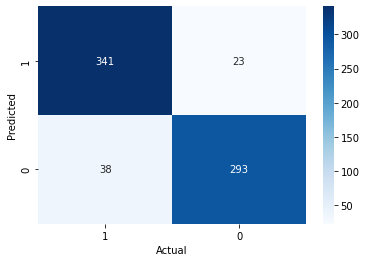

In [160]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

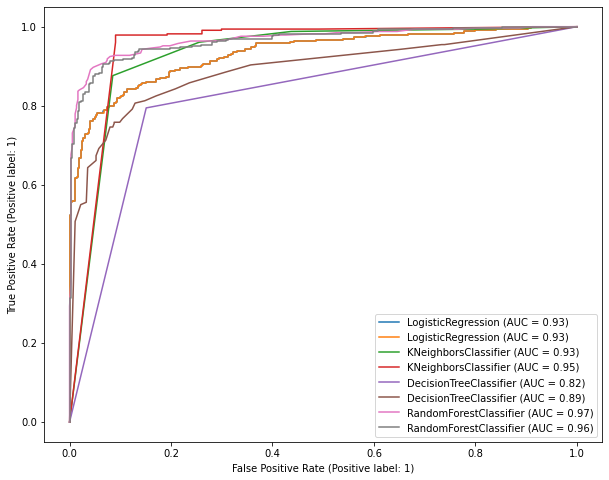

In [161]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)
plot_roc_curve(knncv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)

<strong>Plane random Forest was performing slightly better than tuned RandomForest</strong>

<h3>AdaBoost Classifier</h3>

In [162]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier()

ad.fit(X_train, y_train)

y_pred_train = ad.predict(X_train)
y_pred_test = ad.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9154842689697718
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       795
           1       0.92      0.92      0.92       826

    accuracy                           0.92      1621
   macro avg       0.92      0.92      0.92      1621
weighted avg       0.92      0.92      0.92      1621


Testing Accuracy : 0.860431654676259
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       351
           1       0.87      0.84      0.86       344

    accuracy                           0.86       695
   macro avg       0.86      0.86      0.86       695
weighted avg       0.86      0.86      0.86       695



Text(33.0, 0.5, 'Predicted')

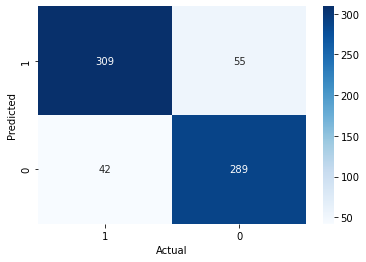

In [163]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

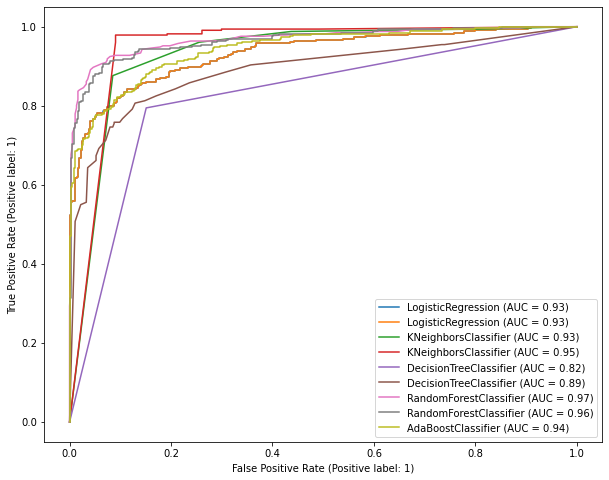

In [164]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)
plot_roc_curve(knncv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)
plot_roc_curve(ad, X_test, y_test, ax=ax)

<h4>HyperParameter Tuning</h4>

In [167]:
adcv = AdaBoostClassifier()

grid_params ={
    'n_estimators':[30,50,70,90,110,130,150],
    'learning_rate':[0.01, 0.05, 0.1,0.3,0.5,0.7, 0.9,1,1.4,1.5]
}

grid_ad = GridSearchCV(adcv, param_grid=grid_params, cv=3, verbose=1)

grid_ad.fit(X_train, y_train)

print('Best Score:', grid_ad.best_score_)
print('Best Params:', grid_ad.best_params_)

Fitting 3 folds for each of 70 candidates, totalling 210 fits
Best Score: 0.9043951530088313
Best Params: {'learning_rate': 1, 'n_estimators': 90}


Building Model with best Params

In [168]:
adcv = AdaBoostClassifier(n_estimators=90)
adcv.fit(X_train, y_train)

y_pred_train = adcv.predict(X_train)
y_pred_test = adcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9358420727945712
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       798
           1       0.93      0.94      0.94       823

    accuracy                           0.94      1621
   macro avg       0.94      0.94      0.94      1621
weighted avg       0.94      0.94      0.94      1621


Testing Accuracy : 0.8820143884892087
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       366
           1       0.87      0.88      0.88       329

    accuracy                           0.88       695
   macro avg       0.88      0.88      0.88       695
weighted avg       0.88      0.88      0.88       695



Text(33.0, 0.5, 'Predicted')

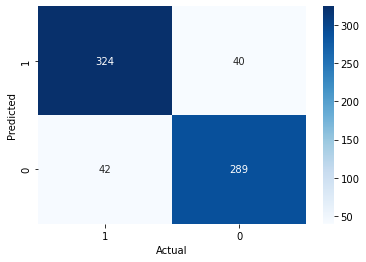

In [169]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

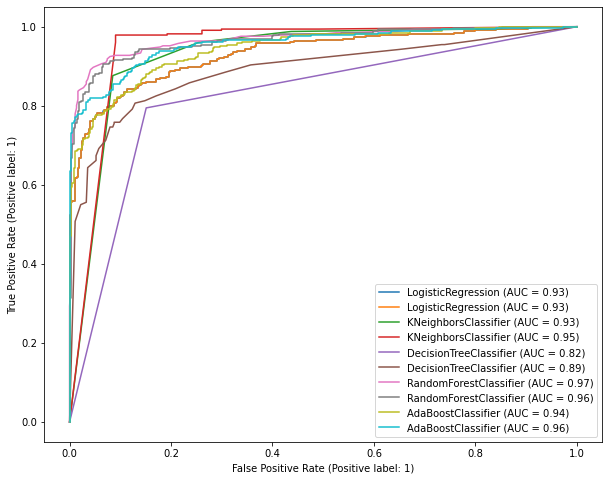

In [170]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)
plot_roc_curve(knncv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)
plot_roc_curve(ad, X_test, y_test, ax=ax)
plot_roc_curve(adcv, X_test, y_test, ax=ax)

<strong>RandomForest Classifier without tuning was the best model.</strong>

<h3>Saving Model</h3>

In [171]:
import pickle

pickle.dump(rf, open('final_model.pickle', 'wb'))